<b>
<H1>Programming for Data Analysis Assignment Codebase</H1>

STUDENT ID: 20285791

ICBT STUDENT ID: ICBT ID : CL/MCSDS/CMU/05/44
</b>

<H4>Install these python libraries</H4>
pip install pandas </br>
pip install numpy </br>
pip install matplotlib </br>
pip install seaborn </br>
pip install scipy </br>
pip install scikit-learn </br>
pip install tensorflow </br>

In [1]:
# Import rquired python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

<H2>B) Read the data from the CSV files </H2>

- The CSV file should be in the same folder as the Jupyter Notebook file. If not, please add the CSV file paths to the below code.

- Read the CSV files 
- Clean the column names
- Replace the meaningful column names

In [2]:
# Read the csv files into pandas DataFrames
employee_df = pd.read_csv("Employee.csv")
fields_df = pd.read_csv("Fields.csv")
workdetails_df = pd.read_csv("WorkDetails.csv")
workcode_df = pd.read_csv("WorkCode.csv")

# Clean and rename the columns of the DataFrames
def clean_and_rename_columns(csv_df, rename_dict):
    original_columns = csv_df.columns.tolist()

    # Strip the column names of leading and trailing spaces, convert to lowercase and replace spaces with underscores
    csv_df.columns = csv_df.columns.str.strip().str.lower().str.replace(' ', '_')
    # Rename the selected columns
    csv_df = csv_df.rename(columns=rename_dict)
    return csv_df, original_columns

# Create the rename dictionaries for each DataFrame
employee_rename_dict = {
    'empcode': 'employee_code',
    'dateofjoin': 'date_of_join'
}

fields_rename_dict = {
    'id': 'employee_id',
    'croptype': 'crop_type',
    'area_(ha)': 'area',
    'numberoftree': 'number_of_trees'
}

workdetails_rename_dict = {
    'empcode': 'employee_code',
    'workdayfraction': 'workday_fraction',
    'qty': 'quantity',
    'extrakilos': 'extra_kilos',
    'work': 'work_code'
}

workcode_rename_dict = {
    'worcode': 'work_code',
    'crop': 'crop_type'
}

# Clean and rename the columns of the DataFrames
df_employee, original_columns_employee = clean_and_rename_columns(employee_df, employee_rename_dict)
df_fields, original_columns_fields = clean_and_rename_columns(fields_df, fields_rename_dict)
df_workdetails, original_columns_workdetails = clean_and_rename_columns(workdetails_df, workdetails_rename_dict)
df_workcode, original_columns_workcode = clean_and_rename_columns(workcode_df, workcode_rename_dict)

# Display the original and cleaned column names
column_names_employee_table = pd.DataFrame(list(zip(original_columns_employee, df_employee.columns)), columns=['Before', 'After'])
column_names_fields_table = pd.DataFrame(list(zip(original_columns_fields, df_fields.columns)), columns=['Before', 'After'])
column_names_workdetails_table = pd.DataFrame(list(zip(original_columns_workdetails, df_workdetails.columns)), columns=['Before', 'After'])
column_names_workcode_table = pd.DataFrame(list(zip(original_columns_workcode, df_workcode.columns)), columns=['Before', 'After'])

print("Column Names Before and After Cleaning for 'Employee.csv':")
print(column_names_employee_table)
print("\nColumn Names Before and After Cleaning for 'Fields.csv':")
print(column_names_fields_table)
print("\nColumn Names Before and After Cleaning for 'WorkDetails.csv':")
print(column_names_workdetails_table)
print("\nColumn Names Before and After Cleaning for 'WorkCode.csv':")
print(column_names_workcode_table)

# Display the DataFrames with Cleaned and Renamed Columns
print(df_employee.head())
print(df_fields.head())
print(df_workdetails.head())
print(df_workcode.head())

Column Names Before and After Cleaning for 'Employee.csv':
       Before          After
0      Estate         estate
1    Division       division
2     EmpCode  employee_code
3      Gender         gender
4  DateofJoin   date_of_join
5      PAMACT         pamact

Column Names Before and After Cleaning for 'Fields.csv':
         Before            After
0            ID      employee_id
1        EState           estate
2      Division         division
3      CropType        crop_type
4         Field            field
5     Area (Ha)             area
6  NumberOfTree  number_of_trees
7          Type             type

Column Names Before and After Cleaning for 'WorkDetails.csv':
            Before             After
0             Year              year
1            Month             month
2              Day               day
3           Estate            estate
4         Division          division
5          EmpCode     employee_code
6             Work         work_code
7  Workdayfraction  work

<H2>A) Detail description of the data sets</H2>

<H3>Employee.csv DataSet description and visualization</H3>

In [3]:
# Print the first 5 rows of the DataFrame
print('\nFirst 5 rows of the Employee DataFrame: ')
display(df_employee.head(5))

# Print the shape of the DataFrame
print('\nShape of the Employee DataFrame: ')
print(df_employee.shape)

# Explore the information about the DataFrame
print('\nInformation about the Employee DataFrame: ')
print(df_employee.info())

# Get the unique values of the DataFrame
print('\nUnique values in the Employee DataFrame: ')
print(df_employee.nunique())

# Print the Nan values in the employee table
print('\nNan values in the Employee DataFrame: ')
print(df_employee.isnull().sum())


First 5 rows of the Employee DataFrame: 


,estate,division,employee_code,gender,date_of_join,pamact
0,EST,HO,2727,F,1/1/1972,A
1,EST,HO,11211,M,2/27/1975,T
2,EST,HO,29593,F,11/9/1972,A
3,EST,HO,37774,F,5/2/1973,A
4,EST,HO,37875,F,5/2/1973,A



Shape of the Employee DataFrame: 
(2015, 6)

Information about the Employee DataFrame: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2015 entries, 0 to 2014
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   estate         2015 non-null   object
 1   division       2015 non-null   object
 2   employee_code  2015 non-null   int64 
 3   gender         2015 non-null   object
 4   date_of_join   1847 non-null   object
 5   pamact         2009 non-null   object
dtypes: int64(1), object(5)
memory usage: 94.6+ KB
None

Unique values in the Employee DataFrame: 
estate              1
division            5
employee_code    1932
gender              2
date_of_join      733
pamact              4
dtype: int64

Nan values in the Employee DataFrame: 
estate             0
division           0
employee_code      0
gender             0
date_of_join     168
pamact             6
dtype: int64


<H4>Exploratary Data Analysis of Employee.csv</H4>

Data distribution for Column: estate


,Unique Values,Propotion
estate,,
EST,2015,100.0


Data distribution for Column: division


,Unique Values,Propotion
division,,
UD,596,29.6
HO,487,24.2
MD,377,18.7
ST,318,15.8
LD,237,11.8


Data distribution for Column: gender


,Unique Values,Propotion
gender,,
F,1119,55.5
M,896,44.5


Data distribution for Column: pamact


,Unique Values,Propotion
pamact,,
A,1474,73.2
T,510,25.3
P,13,0.6
I,12,0.6
NaN,6,0.3


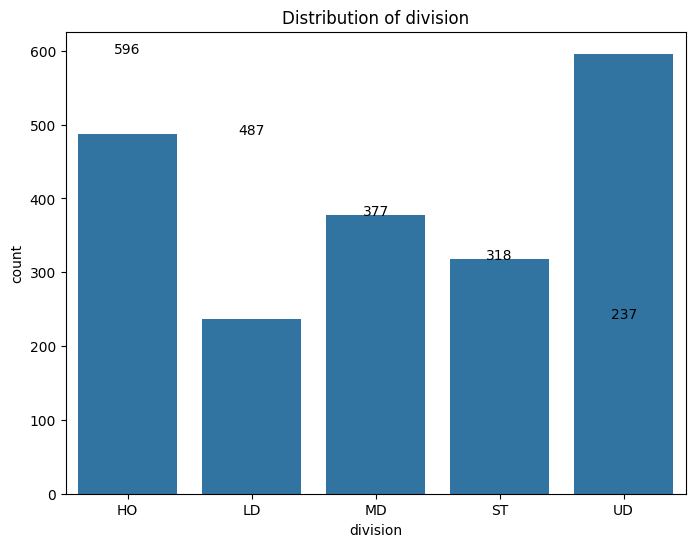

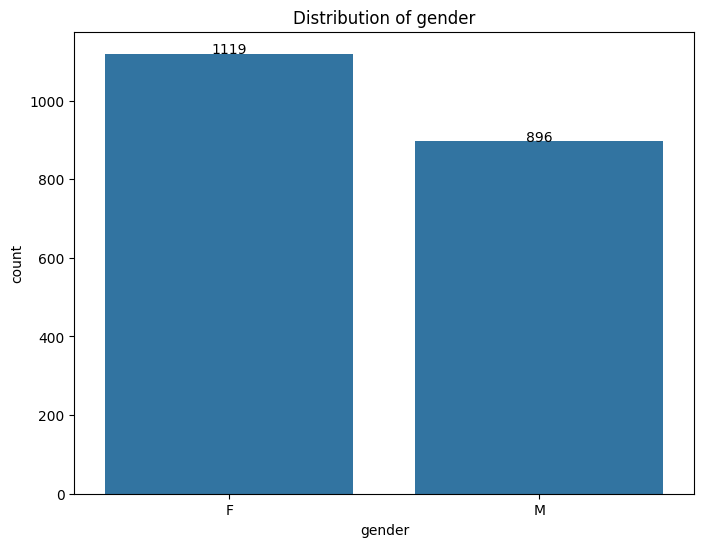

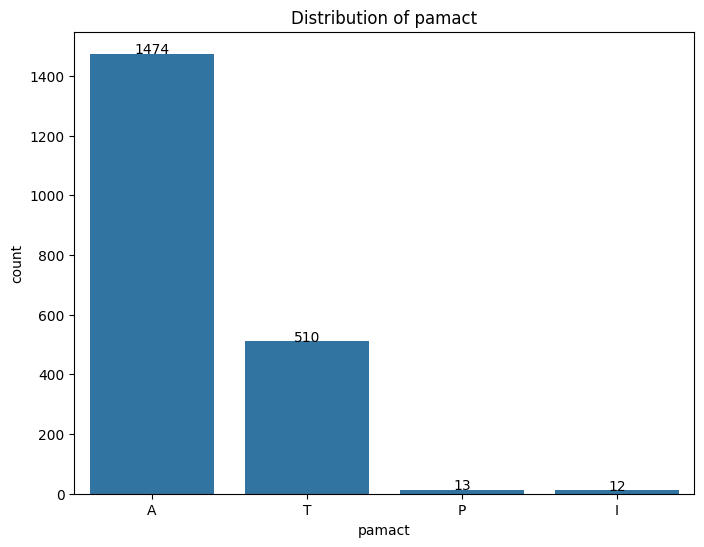

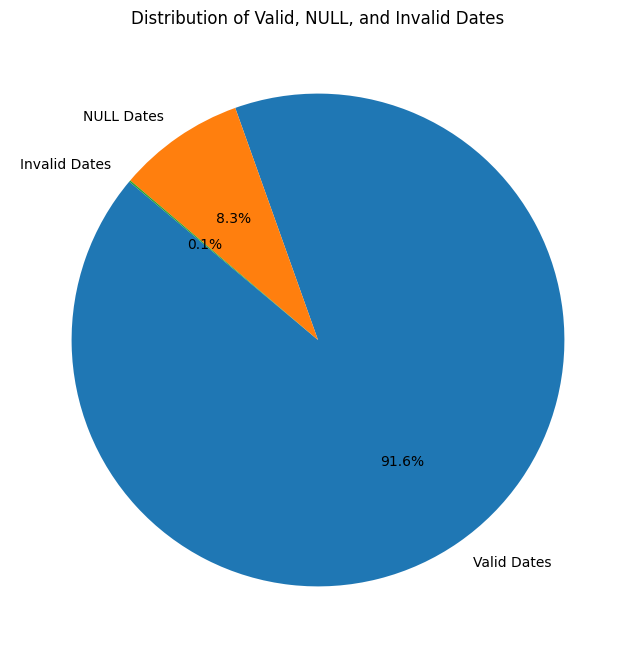

/var/folders/7n/hj2506mx5f96h7w11f8kg2v40000gn/T/ipykernel_6170/3601869796.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emp_except_inv_dates['year_of_join'] = df_emp_except_inv_dates['date_of_join'].dt.year


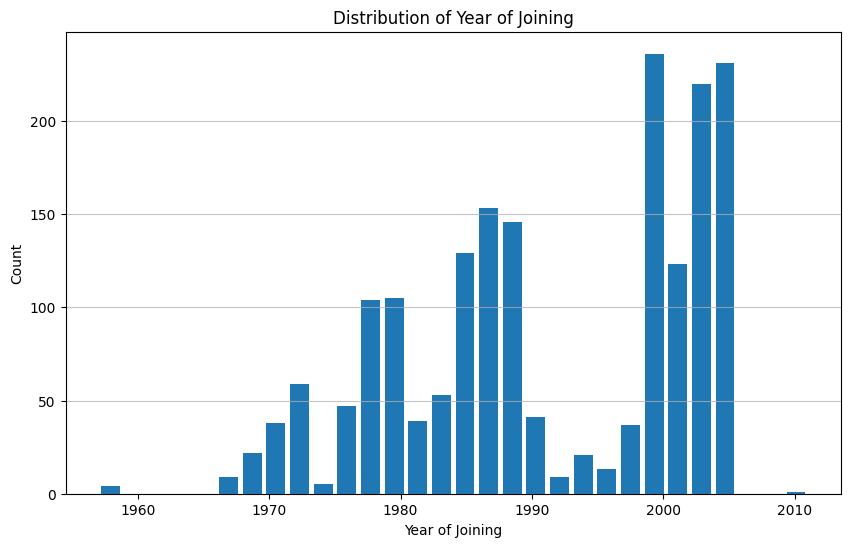

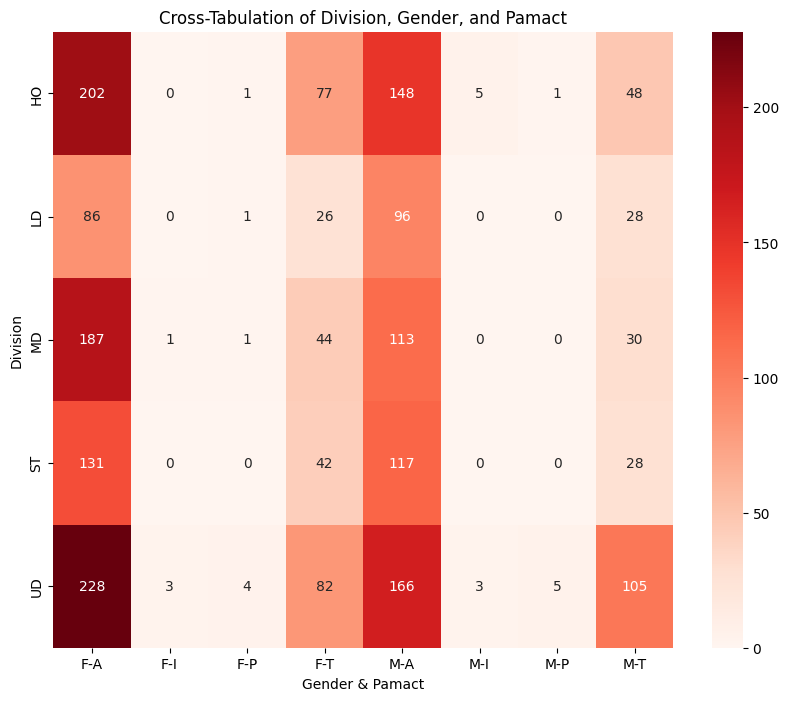

In [4]:
"""
Explore the Distribution and frequency of the Data Columns and Values
"""

# Calculate unique values and their percentages for each categorical column
categorical_columns = ['estate', 'division', 'gender', 'pamact']

for col in categorical_columns:
    # Get unique values, including NaN (null) values
    unique_values = df_employee[col].value_counts(dropna=False)
    
    # Calculate the percentage of each unique value
    data_percentages = unique_values / len(df_employee) * 100
    
    # Merge unique values and percentages into one table
    emp_unique_df = pd.concat([unique_values, data_percentages.round(1)], axis=1)
    emp_unique_df.columns = ['Unique Values', 'Propotion']
    
    print(f"Data distribution for Column: {col}")
    display(emp_unique_df)

"""
Visualize the distribution of the data
"""

# Visualize the distribution of 'division' using a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df_employee, x='division')
plt.title('Distribution of division')
plt.xlabel('division')
# Add labels to the plot
for index, value in enumerate(df_employee['division'].value_counts()):
    plt.text(index, value, str(value), ha='center')
plt.show()

# Visualize the distribution of 'gender'
plt.figure(figsize=(8, 6))
sns.countplot(data=df_employee, x='gender')
plt.title('Distribution of gender')
plt.xlabel('gender')
for index, value in enumerate(df_employee['gender'].value_counts()):
    plt.text(index, value, str(value), ha='center')
plt.show()

# Visualize the distribution of 'pamact'
plt.figure(figsize=(8, 6))
sns.countplot(data=df_employee, x='pamact')
plt.title('Distribution of pamact')
plt.xlabel('pamact')
for index, value in enumerate(df_employee['pamact'].value_counts()):
    plt.text(index, value, str(value), ha='center')
plt.show()

# Visualize the distribution of 'date_of_join' values

# Create lists to store the valid, null, and invalid dates
valid_dates = []
null_dates = []
invalid_dates = []

# Iterate through the date_of_join column
for date in df_employee['date_of_join']:
    if pd.isnull(date):
        null_dates.append(date)
    else:
        try:
            pd.to_datetime(date)
            valid_dates.append(date)
        except ValueError:
            invalid_dates.append(date)

# Visualize the date category distribution
labels = ['Valid Dates', 'NULL Dates', 'Invalid Dates']
sizes = [len(valid_dates), len(null_dates), len(invalid_dates)]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Valid, NULL, and Invalid Dates')
plt.show() 

# Visualize the distribution of employee joined in each year

# Remove rows with invalid date formats
df_employee_dates = df_employee.copy()
df_employee_dates['date_of_join'] = pd.to_datetime(df_employee_dates['date_of_join'], errors='coerce')
df_emp_except_inv_dates = df_employee_dates.dropna()

# Extract and visualize the distribution of years
df_emp_except_inv_dates['year_of_join'] = df_emp_except_inv_dates['date_of_join'].dt.year

# Visualize the distribution of the year of joining using a histogram
plt.figure(figsize=(10, 6))
plt.hist(df_emp_except_inv_dates['year_of_join'], bins=30, rwidth=0.8)
plt.title('Distribution of Year of Joining')
plt.xlabel('Year of Joining')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.75)
plt.show()

"""
Explore the relationship between the columns
"""

# Create a employee data set cross-tabulation between 'division', 'gender', and 'pamact'
employee_cross_tab = pd.crosstab(employee_df['division'], [employee_df['gender'], employee_df['pamact']])

# Visualize the cross-tabulation using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(employee_cross_tab, annot=True, fmt='d', cmap='Reds')
plt.title('Cross-Tabulation of Division, Gender, and Pamact')
plt.xlabel('Gender & Pamact')
plt.ylabel('Division')
plt.show()


In [5]:
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2015 entries, 0 to 2014
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   estate         2015 non-null   object
 1   division       2015 non-null   object
 2   employee_code  2015 non-null   int64 
 3   gender         2015 non-null   object
 4   date_of_join   1847 non-null   object
 5   pamact         2009 non-null   object
dtypes: int64(1), object(5)
memory usage: 94.6+ KB


<H3> Fields.csv DataSet description and visualization </H3>

In [6]:
# Print the first 5 rows of the DataFrame
print('\nFirst 5 rows of the Fields DataFrame: ')
display(df_fields.head(5))

# Print the shape of the DataFrame
print('\nShape of the Fields DataFrame: ')
print(df_fields.shape)

# Explore the information about the DataFrame
print('\nInformation about the Fields DataFrame: ')
print(df_fields.info())

# Get the unique values of the DataFrame
print('\nUnique values of the Fields DataFrame: ')
print(df_fields.nunique())

# Print the Nan values in the employee table
print('\nNan values in the Fields DataFrame: ')
print(df_fields.isnull().sum())


First 5 rows of the Fields DataFrame: 


,employee_id,estate,division,crop_type,field,area,number_of_trees,type
0,2727,EST,HO,T,6A,0.8,9302,R
1,11211,EST,HO,T,3A,3.3,48100,R
2,29593,EST,HO,T,19,5.8,30015,R
3,37774,EST,HO,T,4B,2.5,14308,R
4,37875,EST,HO,T,FW1,0.3,4500,C



Shape of the Fields DataFrame: 
(1932, 8)

Information about the Fields DataFrame: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1932 entries, 0 to 1931
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   employee_id      1932 non-null   int64  
 1   estate           1932 non-null   object 
 2   division         1932 non-null   object 
 3   crop_type        1932 non-null   object 
 4   field            1932 non-null   object 
 5   area             1932 non-null   float64
 6   number_of_trees  1932 non-null   int64  
 7   type             1932 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 120.9+ KB
None

Unique values of the Fields DataFrame: 
employee_id        1932
estate                1
division              5
crop_type             3
field                63
area                 18
number_of_trees      34
type                  3
dtype: int64

Nan values in the Fields DataFram

<H4>Exploratary Data Analysis of Fields.csv</H4>

Data distribution for Column: estate


,Unique Values,Propotion
estate,,
EST,1932,100.0


Data distribution for Column: division


,Unique Values,Propotion
division,,
UD,584,30.2
HO,488,25.3
MD,374,19.4
ST,249,12.9
LD,237,12.3


Data distribution for Column: crop_type


,Unique Values,Propotion
crop_type,,
T,1863,96.4
V,35,1.8
B,34,1.8


Data distribution for Column: field


,Unique Values,Propotion
field,,
GEN,74,3.8
5,70,3.6
9,70,3.6
6A,69,3.6
4B,69,3.6
...,...,...
FAC,11,0.6
C4LV,10,0.5
C4FV,10,0.5


Data distribution for Column: type


,Unique Values,Propotion
type,,
R,1131,58.5
C,711,36.8
O,90,4.7



Statistics of the numeric columns in the Fields DataFrame: 


,area,number_of_trees
count,1932.0,1932.0
mean,2.7,23148.1
std,3.0,22457.6
min,0.3,0.0
25%,0.8,9257.0
50%,1.8,17631.0
75%,3.0,29000.0
max,16.0,124000.0


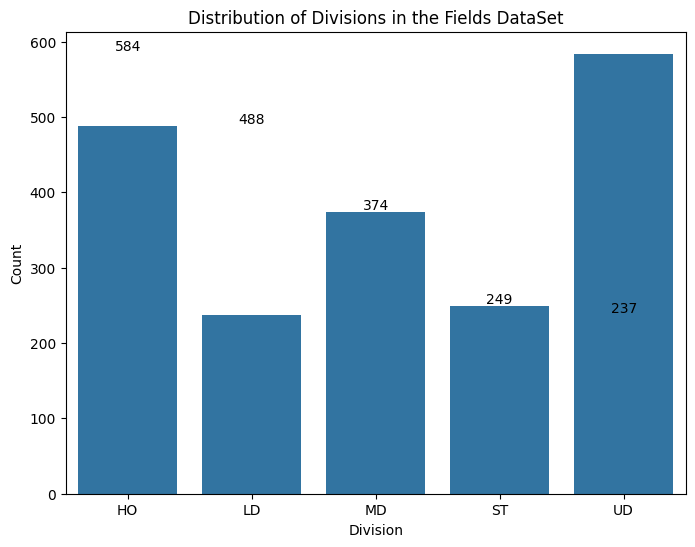

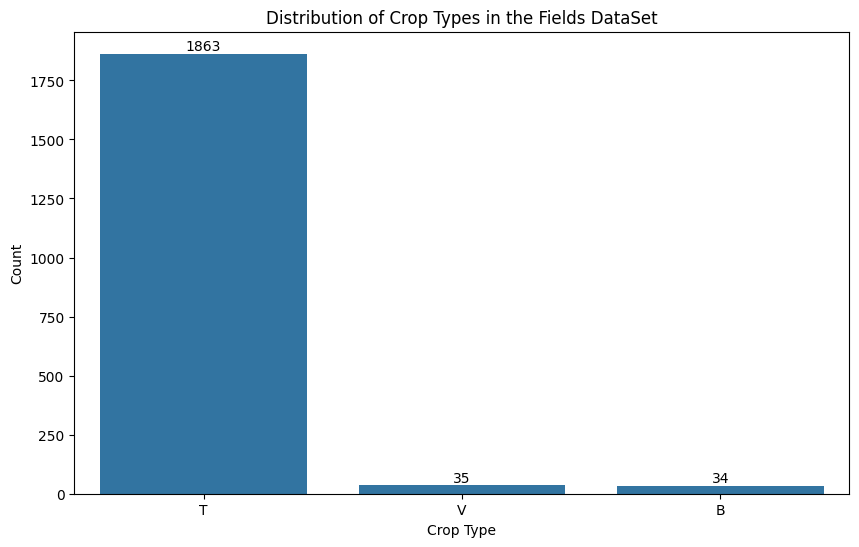

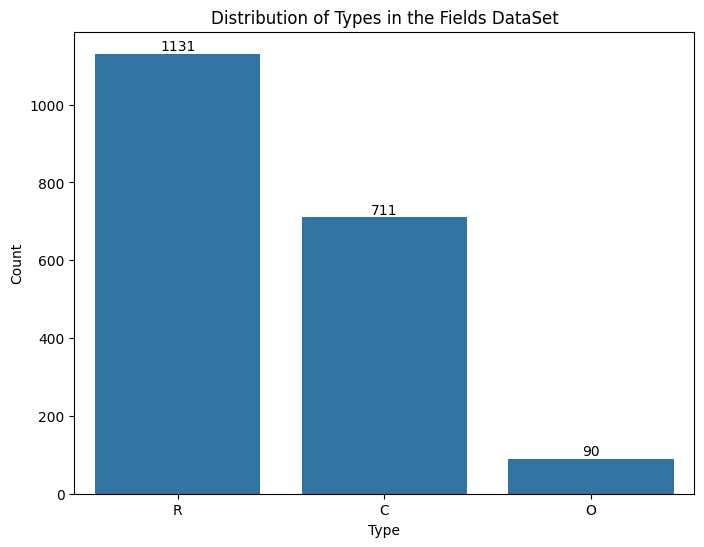

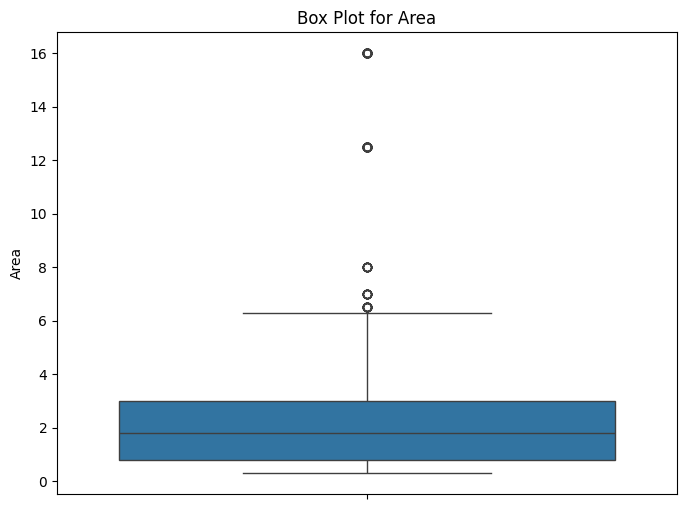

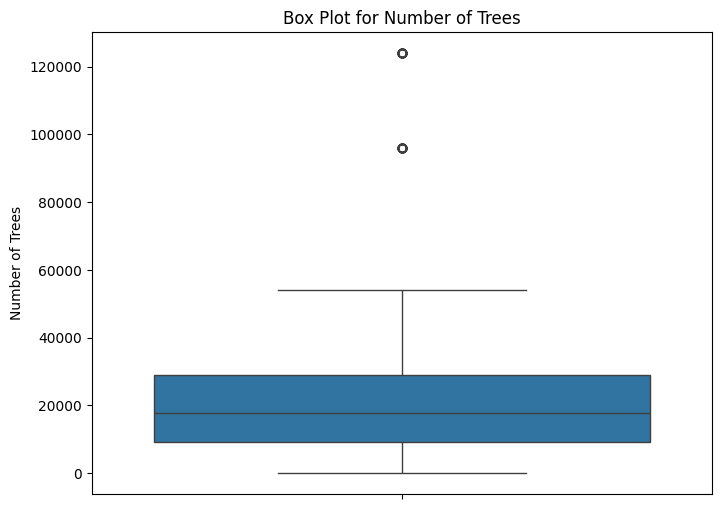

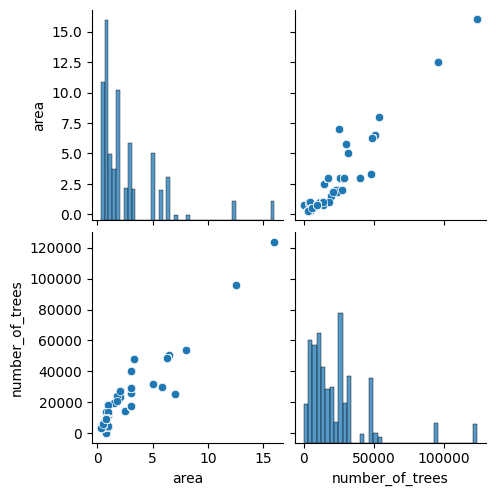


Correlation matrix of area vs number_of_trees:
                     area  number_of_trees
area             1.000000         0.945856
number_of_trees  0.945856         1.000000


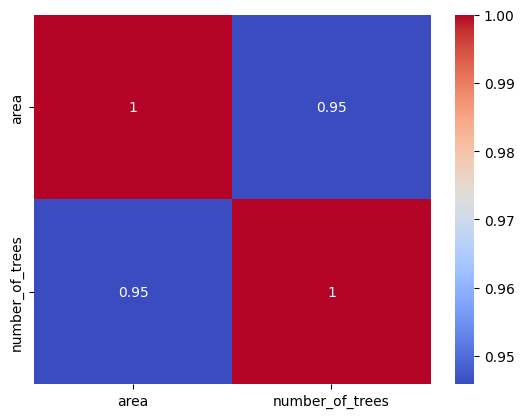

In [7]:
"""
Explore the Distribution and frequency of the Data Columns and Values
"""

# Calculate unique values and their percentages for each categorical column
categorical_fieds_columns = ['estate', 'division', 'crop_type', 'field', 'type']

for col in categorical_fieds_columns:
    # Get unique values, including NaN (null) values
    unique_values = df_fields[col].value_counts(dropna=False)
    
    # Calculate the percentage of each unique value
    data_percentages = unique_values / len(df_fields) * 100
    
    # Merge unique values and percentages into one table
    fields_unique_df = pd.concat([unique_values, data_percentages.round(1)], axis=1)
    fields_unique_df.columns = ['Unique Values', 'Propotion']
    
    print(f"Data distribution for Column: {col}")
    display(fields_unique_df)

# Explore the statistics of the numeric columns
print('\nStatistics of the numeric columns in the Fields DataFrame: ')
display(df_fields[['area', 'number_of_trees']].describe().round(1))

"""
Visualize the distribution of the data
"""

# Visualize the distribution of the division column in the Fields DataSet
plt.figure(figsize=(8, 6))
sns.countplot(data=df_fields, x='division')
plt.title('Distribution of Divisions in the Fields DataSet')
plt.xlabel('Division')
plt.ylabel('Count')
for index, value in enumerate(df_fields['division'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

# Visualize the distribution of the crop_type column in the Fields DataSet
plt.figure(figsize=(10, 6))
sns.countplot(data=df_fields, x='crop_type')
plt.title('Distribution of Crop Types in the Fields DataSet')
plt.xlabel('Crop Type')
plt.ylabel('Count')
for index, value in enumerate(df_fields['crop_type'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

# Visualize the distribution of the type column in the Fields DataSet
plt.figure(figsize=(8, 6))
sns.countplot(data=df_fields, x='type')
plt.title('Distribution of Types in the Fields DataSet')
plt.xlabel('Type')
plt.ylabel('Count')
for index, value in enumerate(df_fields['type'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

# Visualize the distribution of the area column in the Fields DataSet
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_fields, y='area')
plt.title('Box Plot for Area')
plt.ylabel('Area')
plt.show()

# Visualize the distribution of the number_of_trees column in the Fields DataSet
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_fields, y='number_of_trees')
plt.title('Box Plot for Number of Trees')
plt.ylabel('Number of Trees')
plt.show()

"""
Explore the relationship between the columns
"""

# Identify the pairwise relationship between the area and number_of_trees columns
sns.pairplot(df_fields[['area', 'number_of_trees']], kind='scatter')
plt.show()

# Get Correlation between the area and number_of_trees columns
fields_correlation_matrix = df_fields[['area', 'number_of_trees']].corr()
print("\nCorrelation matrix of area vs number_of_trees:")
print(fields_correlation_matrix)

# Heatmap for correlation matrix vizualization
sns.heatmap(fields_correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [8]:
df_fields.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1932 entries, 0 to 1931
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   employee_id      1932 non-null   int64  
 1   estate           1932 non-null   object 
 2   division         1932 non-null   object 
 3   crop_type        1932 non-null   object 
 4   field            1932 non-null   object 
 5   area             1932 non-null   float64
 6   number_of_trees  1932 non-null   int64  
 7   type             1932 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 120.9+ KB


<H3>WorkDetails.csv DataSet description and visualization</H3>

In [9]:
# Print the first 5 rows of the DataFrame
print('\nFirst 5 rows of the WorkDetails DataFrame: ')
display(df_workdetails.head(5))

# Print the shape of the DataFrame
print('\nShape of the WorkDetails DataFrame: ')
print(df_workdetails.shape)

# Explore the information about the DataFrame
print('\nInformation about the WorkDetails DataFrame: ')
print(df_workdetails.info())

# Get the unique values of the DataFrame
print('\nUnique values in the WorkDetails DataFrame: ')
print(df_workdetails.nunique())

# Print the Nan values in the employee table
print('\nNan values in the WorkDetails DataFrame: ')
print(df_workdetails.isnull().sum())


First 5 rows of the WorkDetails DataFrame: 


,year,month,day,estate,division,employee_code,work_code,workday_fraction,quantity,extra_kilos
0,2012,6,20,EST,HO,41107,ABS,1.0,22.0,0.0
1,2012,7,9,EST,HO,41309,PLK,1.0,22.0,0.0
2,2012,9,27,EST,HO,41309,PLK,1.0,22.0,0.0
3,2014,1,10,EST,HO,41309,PLK,1.0,22.0,0.0
4,2013,2,25,EST,HO,41309,PLK,1.5,22.0,0.0



Shape of the WorkDetails DataFrame: 
(1048575, 10)

Information about the WorkDetails DataFrame: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   year              1048575 non-null  int64  
 1   month             1048575 non-null  int64  
 2   day               1048575 non-null  int64  
 3   estate            1048575 non-null  object 
 4   division          1048575 non-null  object 
 5   employee_code     1048575 non-null  int64  
 6   work_code         1048575 non-null  object 
 7   workday_fraction  1048575 non-null  float64
 8   quantity          907547 non-null   float64
 9   extra_kilos       949751 non-null   float64
dtypes: float64(3), int64(4), object(3)
memory usage: 80.0+ MB
None

Unique values in the WorkDetails DataFrame: 
year                   4
month                 12
day                   31
estate     

<H4>Exploratary Data Analysis of WorkDetails.csv</H4>

Data distribution for Column: year


,Unique Values,Propotion
year,,
2012,305659,29.1
2013,271798,25.9
2014,266276,25.4
2015,204842,19.5


Data distribution for Column: division


,Unique Values,Propotion
division,,
UD,347941,33.2
HO,236316,22.5
MD,180682,17.2
ST,164329,15.7
LD,119307,11.4


Data distribution for Column: work_code


,Unique Values,Propotion
work_code,,
ABS,364458,34.8
PLK,337740,32.2
LLO,84152,8.0
XXX,58952,5.6
XHP,31421,3.0
...,...,...
LS,1,0.0
1K1,1,0.0
PTR,1,0.0



Statistics of the numeric columns in the WorkDetails DataFrame: 


,workday_fraction,quantity,extra_kilos
count,1048575.0,907547.0,949751.0
mean,1.0,66.8,8.8
std,0.1,213.4,168.6
min,0.5,22.0,0.0
25%,1.0,34.0,0.0
50%,1.0,52.0,0.0
75%,1.0,71.0,9.0
max,1.5,4598.0,8736.0



Distribution of Not Null and Null Values of Quantity and Extra Kilos columns: 
        Column Value Type  Number of Records  Propotion
0     quantity      Valid             907547  86.550509
1     quantity       NULL             141028  13.449491
2  extra_kilos      Valid             949751  90.575400
3  extra_kilos       NULL              98824   9.424600


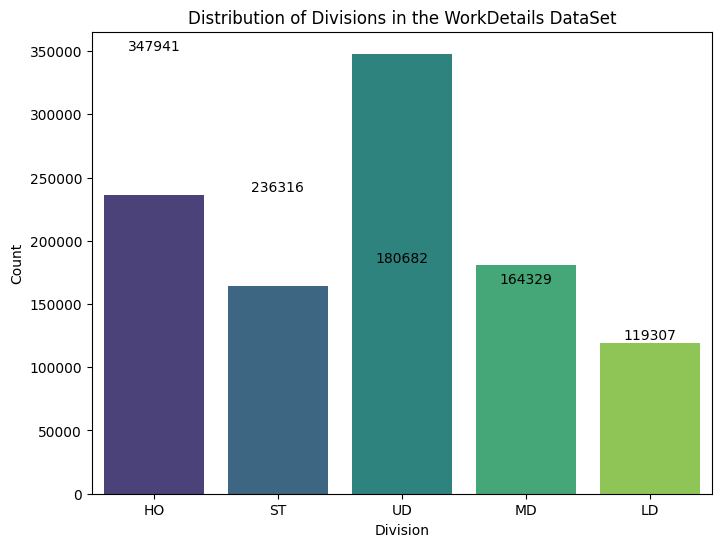

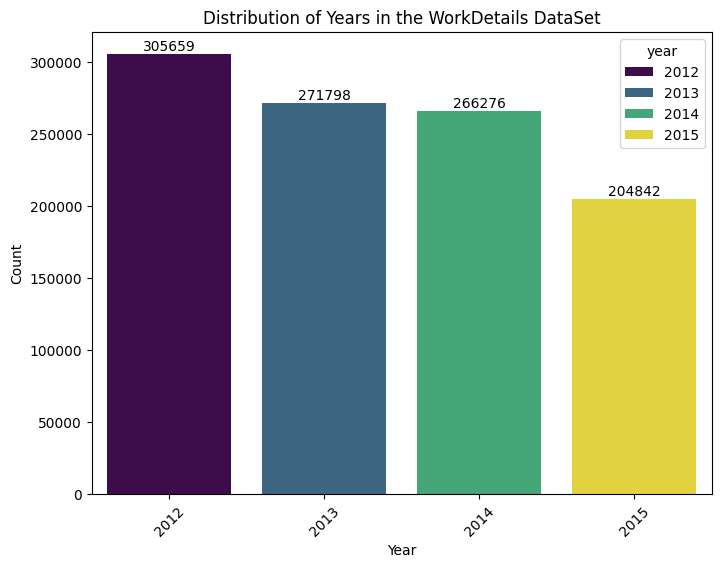

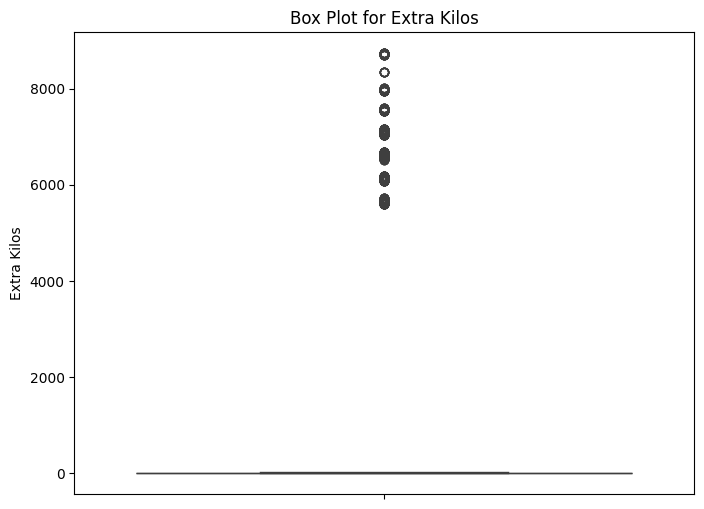

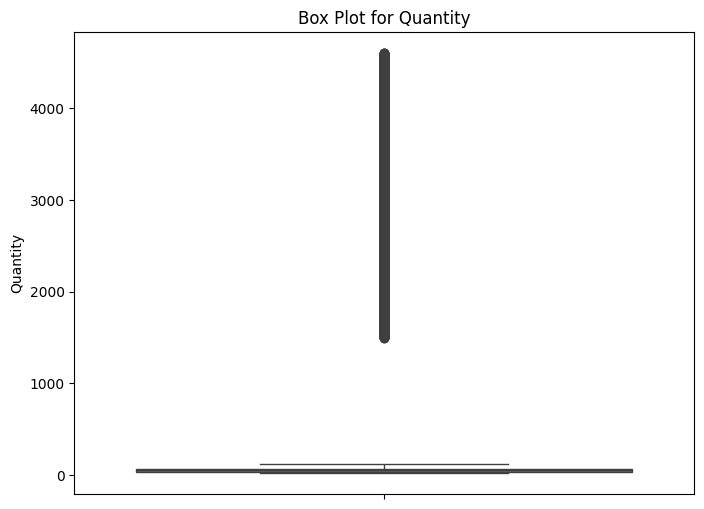

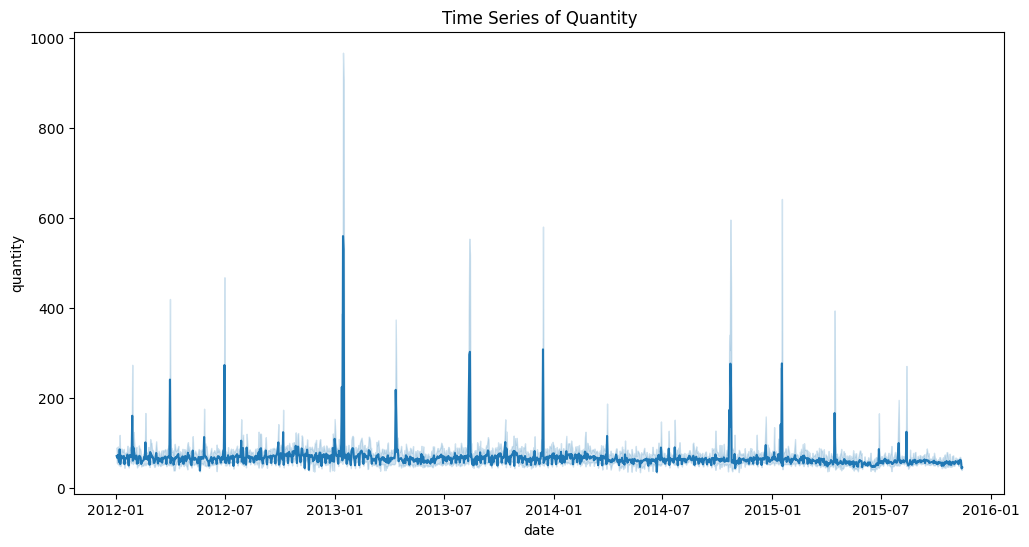

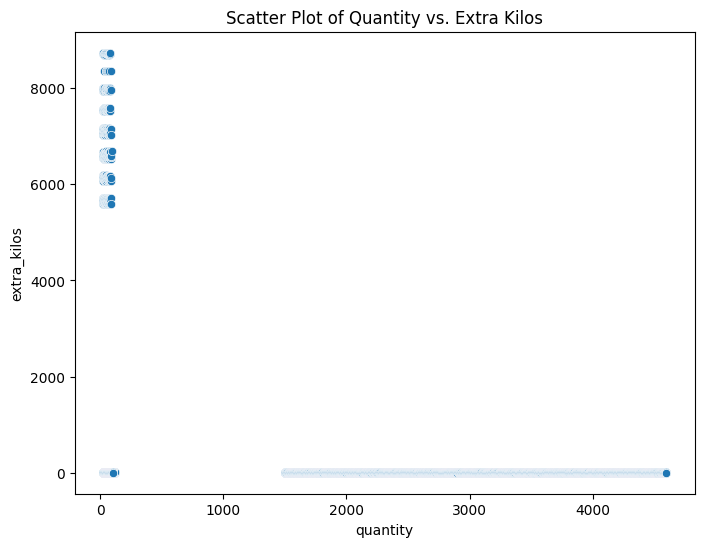

In [10]:
"""
Explore the Distribution and frequency of the Data Columns and Values
"""

# Calculate unique values and their percentages for each categorical column
categorical_workdetails_columns = ['year', 'division', 'work_code']

# year,  month, day, division,  employee_code, work_code, workday_fraction, quantity, extra_kilos


for col in categorical_workdetails_columns:
    # Get unique values, including NaN (null) values
    unique_values = df_workdetails[col].value_counts(dropna=False)
    
    # Calculate the percentage of each unique value
    data_percentages = unique_values / len(df_workdetails) * 100
    
    # Merge unique values and percentages into one table
    workdetails_unique_df = pd.concat([unique_values, data_percentages.round(1)], axis=1)
    workdetails_unique_df.columns = ['Unique Values', 'Propotion']

    print(f"Data distribution for Column: {col}")
    display(workdetails_unique_df) 

# Explore the statistics of the numeric columns
print('\nStatistics of the numeric columns in the WorkDetails DataFrame: ')
display(df_workdetails[['workday_fraction', 'quantity', 'extra_kilos']].describe().round(1))

"""
Distribution of Not Null and Null Values of Quantity and Extra Kilos columns
"""

# Calculate valid and null counts
valid_quantity_count = df_workdetails['quantity'].notnull().sum()
null_quantity_count = df_workdetails['quantity'].isnull().sum()
valid_extra_kilos_count = df_workdetails['extra_kilos'].notnull().sum()
null_extra_kilos_count = df_workdetails['extra_kilos'].isnull().sum()

# Calculate percentages
total_rows = len(df_workdetails)
percentage_valid_quantity = (valid_quantity_count / total_rows) * 100
percentage_null_quantity = (null_quantity_count / total_rows) * 100
percentage_valid_extra_kilos = (valid_extra_kilos_count / total_rows) * 100
percentage_null_extra_kilos = (null_extra_kilos_count / total_rows) * 100

# Create a data frame quantity_kilos_dist
quantity_kilos_dist = {
    'Column': ['quantity', 'quantity', 'extra_kilos', 'extra_kilos'],
    'Value Type': ['Valid', 'NULL', 'Valid', 'NULL'],
    'Number of Records': [valid_quantity_count, null_quantity_count, valid_extra_kilos_count, null_extra_kilos_count],
    'Propotion': [percentage_valid_quantity, percentage_null_quantity, percentage_valid_extra_kilos, percentage_null_extra_kilos]
}
# Create a DataFrame quantity_kilos_df
quantity_kilos_df = pd.DataFrame(quantity_kilos_dist)

print('\nDistribution of Not Null and Null Values of Quantity and Extra Kilos columns: ')
print(quantity_kilos_df)

"""
Visualize the distribution of the data
"""

# Visualize the distribution of the division column in the WorkDetails DataSet
plt.figure(figsize=(8, 6))
sns.countplot(data=df_workdetails, x='division', palette='viridis', hue='division')
plt.title('Distribution of Divisions in the WorkDetails DataSet')
plt.xlabel('Division')
plt.ylabel('Count')
for index, value in enumerate(df_workdetails['division'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

# Visualize the distribution of the year column in the WorkDetails DataSet
plt.figure(figsize=(8, 6))
sns.countplot(data=df_workdetails, x='year', palette='viridis', hue='year')
plt.title('Distribution of Years in the WorkDetails DataSet')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45) 
for index, value in enumerate(df_workdetails['year'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

# Visualize the distribution of the extra_kilos column in the WorkDetails DataSet
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_workdetails, y='extra_kilos')
plt.title('Box Plot for Extra Kilos')
plt.ylabel('Extra Kilos')
plt.show()

# Visualize the distribution of the quantity column in the WorkDetails DataSet
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_workdetails, y='quantity')
plt.title('Box Plot for Quantity')
plt.ylabel('Quantity')
plt.show()

"""
Explore the relationship between the columns
"""

# Time series analysis of the quantity column with the date column

# Assuming 'year', 'month', and 'day' are parsed as a datetime column
df_workdetails_timeseries = df_workdetails.copy()
df_workdetails_timeseries['date'] = pd.to_datetime(df_workdetails_timeseries[['year', 'month', 'day']])

# Time series plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='quantity', data=df_workdetails_timeseries)
plt.title('Time Series of Quantity')
plt.show()

# Scatter plot for 'quantity' vs. 'extra_kilos'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='quantity', y='extra_kilos', data=df_workdetails)
plt.title('Scatter Plot of Quantity vs. Extra Kilos')
plt.show()

In [11]:
df_workdetails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   year              1048575 non-null  int64  
 1   month             1048575 non-null  int64  
 2   day               1048575 non-null  int64  
 3   estate            1048575 non-null  object 
 4   division          1048575 non-null  object 
 5   employee_code     1048575 non-null  int64  
 6   work_code         1048575 non-null  object 
 7   workday_fraction  1048575 non-null  float64
 8   quantity          907547 non-null   float64
 9   extra_kilos       949751 non-null   float64
dtypes: float64(3), int64(4), object(3)
memory usage: 80.0+ MB


<H3>WorkCode.csv DataSet description and visualization</H3>

In [12]:
# Print the first 5 rows of the DataFrame
print('\nFirst 5 rows of the Fields DataFrame: ')
display(df_workcode.head(5))

# Print the shape of the DataFrame
print('\nShape of the Fields DataFrame: ')
print(df_workcode.shape)

# Explore the information about the DataFrame
print('\nInformation about the Fields DataFrame: ')
print(df_workcode.info())

# Get the unique values of the DataFrame
print('\nUnique values of the Fields DataFrame: ')
print(df_workcode.nunique())

# Print the Nan values in the employee table
print('\nNan values in the Fields DataFrame: ')
print(df_workcode.isnull().sum())


First 5 rows of the Fields DataFrame: 


,work_code,crop_type,type
0,CHC,T,R
1,TPR,T,R
2,MUS,T,R
3,WBN,T,R
4,EFD,T,R



Shape of the Fields DataFrame: 
(483, 3)

Information about the Fields DataFrame: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483 entries, 0 to 482
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   work_code  483 non-null    object
 1   crop_type  483 non-null    object
 2   type       479 non-null    object
dtypes: object(3)
memory usage: 11.4+ KB
None

Unique values of the Fields DataFrame: 
work_code    481
crop_type      1
type           3
dtype: int64

Nan values in the Fields DataFrame: 
work_code    0
crop_type    0
type         4
dtype: int64


<H4>Exploratary Data Analysis of WorkCode.csv</H4>

In [13]:
"""
Explore the Distribution and frequency of the Data Columns and Values
"""

# Calculate unique values and their percentages for each categorical column
categorical_workcode_columns = ['crop_type', 'type']

for col in categorical_workcode_columns:
    # Get unique values, including NaN (null) values
    unique_values = df_workcode[col].value_counts(dropna=False)
    
    # Calculate the percentage of each unique value
    data_percentages = unique_values / len(df_workcode) * 100
    
    # Merge unique values and percentages into one table
    workcode_unique_df = pd.concat([unique_values, data_percentages.round(1)], axis=1)
    workcode_unique_df.columns = ['Unique Values', 'Propotion']
    
    print(f"Data distribution for Column: {col}")
    display(workcode_unique_df)

Data distribution for Column: crop_type


,Unique Values,Propotion
crop_type,,
T,483,100.0


Data distribution for Column: type


,Unique Values,Propotion
type,,
R,336,69.6
O,78,16.1
C,65,13.5
NaN,4,0.8


In [14]:
df_workcode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483 entries, 0 to 482
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   work_code  483 non-null    object
 1   crop_type  483 non-null    object
 2   type       479 non-null    object
dtypes: object(3)
memory usage: 11.4+ KB


<H2>C) Removing the outliers of the datasets</H2>

<H3>Employee DataSet</H3>

Remove the duplicate records from the employee dataset.

In [15]:
print("\nRecords count of the employee data set before removing the duplicates: ", df_employee.shape)

# Remove the duplicate rows from the df_employee DataFrame consider employee_code column, division column and gender column
df_employee.drop_duplicates(subset=['employee_code', 'gender', 'division'], inplace=True, keep='last')

print("\nRecords count of the employee data set after removing the duplicates: ", df_employee.shape)


Records count of the employee data set before removing the duplicates:  (2015, 6)

Records count of the employee data set after removing the duplicates:  (2015, 6)


<H4>Identifying the Outliers of Employee DataSet</H4>

Invalid dates (2 values, 0.1%) are included in the data set. 

Replace the Invalid Dates with NULL values to remove the outlier. 

In [16]:
# Get the number of null values in date_of_join column 
print("\nOriginal Null count of date_of_join: ", df_employee['date_of_join'].isnull().sum())

# Create lists to store the valid, null, and invalid dates
valid_dates = []
null_dates = []
invalid_dates = []

# Iterate through the date_of_join column
for date in df_employee['date_of_join']:
    if pd.isnull(date):
        null_dates.append(date)
    else:
        try:
            pd.to_datetime(date)
            valid_dates.append(date)
        except ValueError:
            invalid_dates.append(date)

# Replace the invalid dates with null values in the date_of_join column
df_employee['date_of_join'] = df_employee['date_of_join'].replace(invalid_dates, np.nan)

print("\nLatest Null count of date_of_join: ", df_employee['date_of_join'].isnull().sum())


Original Null count of date_of_join:  168

Latest Null count of date_of_join:  170


<H3>Fields DataSet</H3>

Remove the duplicate records from the fields dataset.

In [17]:
print("\nRecords count of the fields data set before removing the duplicates: ", df_fields.shape)

# Remove the duplicate rows from the df_fields DataFrame consider employee_code column, division column and gender column
df_fields.drop_duplicates(subset=['employee_id', 'division'], inplace=True, keep='last')

print("\nRecords count of the fileds data set after removing the duplicates: ", df_fields.shape)


Records count of the fields data set before removing the duplicates:  (1932, 8)

Records count of the fileds data set after removing the duplicates:  (1932, 8)


<H4>Identifying the Outliers of Fields DataSet</H4>

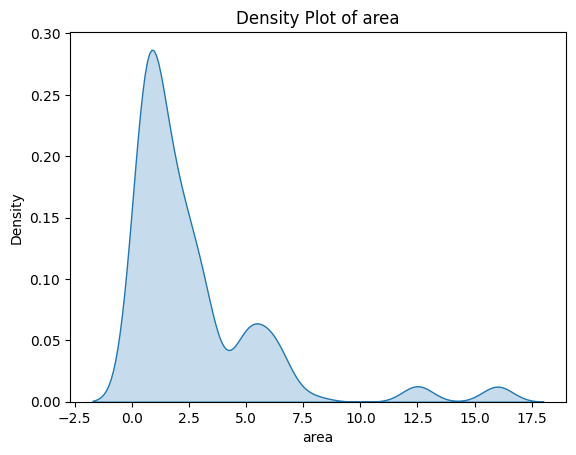

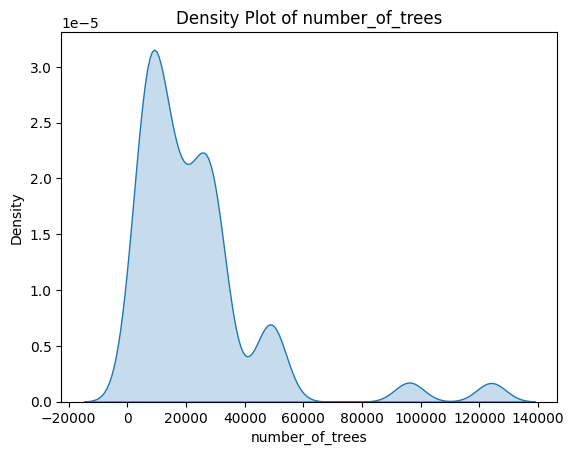


Number of outliers for area:  124

Number of outliers for number_of_trees:  81


In [18]:
numerical_fields_columns = ['area', 'number_of_trees']

# Visualize numerical columns with density plots to check for outliers
for column in numerical_fields_columns:
    sns.kdeplot(data=df_fields[column], fill=True)
    plt.title(f'Density Plot of {column}')
    plt.xlabel(column)
    plt.show()

# Use the statistical method of IQR to detect the outliers

# Detect the outliers based on IQR for 'area'
Q1_area = df_fields['area'].quantile(0.25)
Q3_area = df_fields['area'].quantile(0.75)
IQR_area = Q3_area - Q1_area
# Get the outliers for 'area'
outlier_condition_area = (df_fields['area'] < (Q1_area - 1.5 * IQR_area)) | (df_fields['area'] 
                                                                             > (Q3_area + 1.5 * IQR_area))
print('\nNumber of outliers for area: ', outlier_condition_area.sum())
# df_fields = df_fields[~outlier_condition_area]

# Detect the outliers based on IQR for 'number_of_trees'
Q1_trees = df_fields['number_of_trees'].quantile(0.25)
Q3_trees = df_fields['number_of_trees'].quantile(0.75)
IQR_trees = Q3_trees - Q1_trees
# Get the outliers for 'number_of_trees'
outlier_condition_trees = (df_fields['number_of_trees'] < (Q1_trees - 1.5 * IQR_trees)) | (df_fields['number_of_trees'] 
                                                                                           > (Q3_trees + 1.5 * IQR_trees))
print('\nNumber of outliers for number_of_trees: ', outlier_condition_trees.sum())
# df_fields = df_fields[~outlier_condition_trees]

<H3>WorkDetails DataSet</H3>

Remove the duplicate records from the Work Details DataSet.

In [19]:
print("\nRecords count of the work details data set before removing the duplicates: ", df_workdetails.shape)

# Remove the duplicate rows from the df_fields DataFrame consider employee_code column, division column and gender column
df_workdetails.drop_duplicates(subset=['employee_code', 'year', 'month', 'day', 'division', 'work_code'], inplace=True, keep='last')

print("\nRecords count of the work details data set after removing the duplicates: ", df_workdetails.shape)


Records count of the work details data set before removing the duplicates:  (1048575, 10)

Records count of the work details data set after removing the duplicates:  (1048509, 10)


<H4>Identifying the outliers of Work Details DataSet</H4>

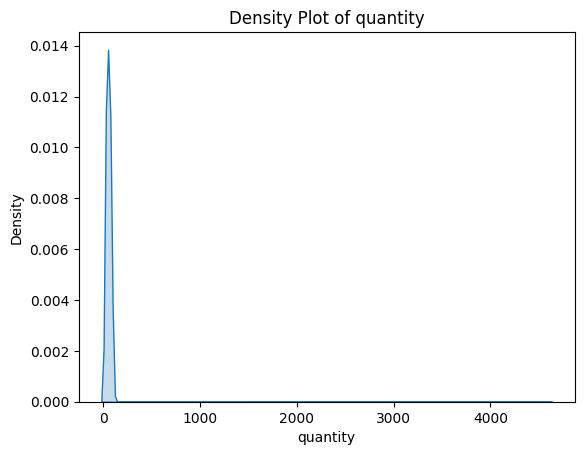

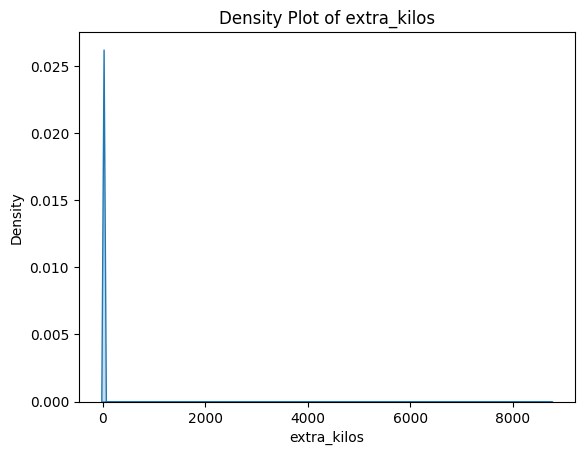


Number of outliers for quantity:  4167

Number of outliers for extra_kilos:  584


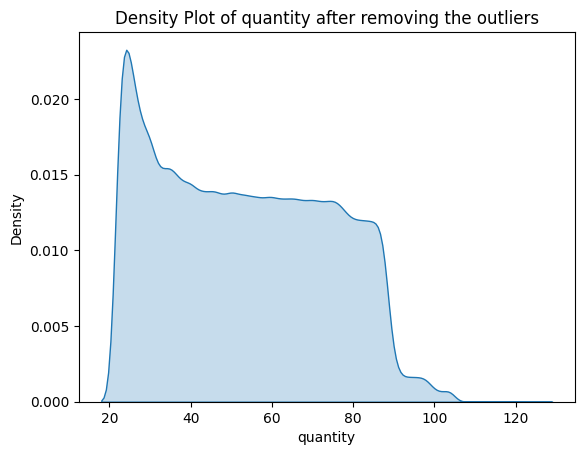

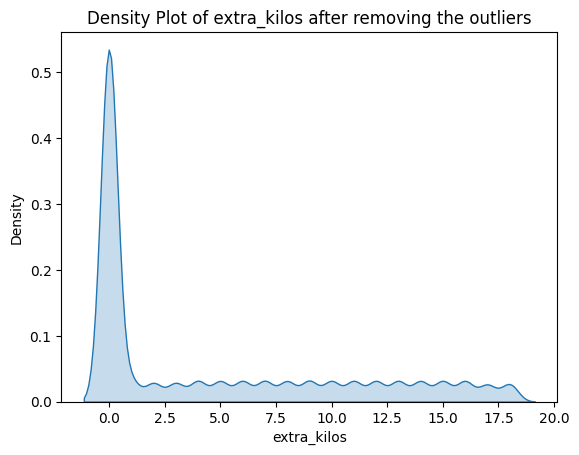

In [20]:
# Visualize and detect outliers for 'quantity' using box plots

numerical_workdays_columns = ['quantity', 'extra_kilos']

# Visualize numerical columns with density plots to check for outliers
for column in numerical_workdays_columns:
    sns.kdeplot(data=df_workdetails[column], fill=True)
    plt.title(f'Density Plot of {column}')
    plt.xlabel(column)
    plt.show()

# Detect and remove outliers based on IQR for 'quantity'
Q1_quantity = df_workdetails['quantity'].quantile(0.25)
Q3_quantity = df_workdetails['quantity'].quantile(0.75)
IQR_quantity = Q3_quantity - Q1_quantity
# Get the outliers for 'quantity'
outlier_condition_quantity = (df_workdetails['quantity'] < (Q1_quantity - 1.5 * IQR_quantity)) | (df_workdetails['quantity'] 
                                                                                                  > (Q3_quantity + 1.5 * IQR_quantity))
print('\nNumber of outliers for quantity: ', outlier_condition_quantity.sum())
df_workdetails = df_workdetails[~outlier_condition_quantity]

# Detect and remove outliers based on IQR for 'extra_kilos'
Q1_kilos = df_workdetails['extra_kilos'].quantile(0.25)
Q3_kilos = df_workdetails['extra_kilos'].quantile(0.75)
IQR_kilos = Q3_kilos - Q1_kilos
# Get the outliers for 'extra_kilos'
outlier_condition_kilos = (df_workdetails['extra_kilos'] < (Q1_kilos - 1.5 * IQR_kilos)) | (df_workdetails['extra_kilos'] > (Q3_kilos + 1.5 * IQR_kilos))
print('\nNumber of outliers for extra_kilos: ', outlier_condition_kilos.sum())
df_workdetails = df_workdetails[~outlier_condition_kilos]

# Visualize numerical columns after removing the outliers
for column in numerical_workdays_columns:
    sns.kdeplot(data=df_workdetails[column], fill=True)
    plt.title(f'Density Plot of {column} after removing the outliers')
    plt.xlabel(column)
    plt.show()

In [21]:
df_employee.info()
df_fields.info()
df_workdetails.info()
df_workcode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2015 entries, 0 to 2014
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   estate         2015 non-null   object
 1   division       2015 non-null   object
 2   employee_code  2015 non-null   int64 
 3   gender         2015 non-null   object
 4   date_of_join   1845 non-null   object
 5   pamact         2009 non-null   object
dtypes: int64(1), object(5)
memory usage: 94.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1932 entries, 0 to 1931
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   employee_id      1932 non-null   int64  
 1   estate           1932 non-null   object 
 2   division         1932 non-null   object 
 3   crop_type        1932 non-null   object 
 4   field            1932 non-null   object 
 5   area             1932 non-null   float64
 6   number_of_trees  193

<H2>D) NULL or Missing Value Treatment</H2>

Use the Median Imputation method.

In [22]:
print('\nBefore Imputation:')
print('\nNumber of Null values for quantity: ', df_workdetails['quantity'].isnull().sum())
print('\nNumber of Null values for extra_kilos: ', df_workdetails['extra_kilos'].isnull().sum())

# Impute missing values using the median imputer function
def median_imputer(imputer_df, column_name):
    # Get the median value of the column
    median_value = imputer_df[column_name].median()
    # Replace the null values with the median value
    imputer_df[column_name].fillna(median_value, inplace=True)

median_imputer(df_workdetails, 'quantity')
median_imputer(df_workdetails, 'extra_kilos')

print('\nAfter Imputation:')
print('\nNumber of Null values for quantity: ', df_workdetails['quantity'].isnull().sum())
print('\nNumber of Null values for extra_kilos: ', df_workdetails['extra_kilos'].isnull().sum())


Before Imputation:

Number of Null values for quantity:  140971

Number of Null values for extra_kilos:  98573

After Imputation:

Number of Null values for quantity:  0

Number of Null values for extra_kilos:  0


In [23]:
df_employee.info()
df_fields.info()
df_workdetails.info()
df_workcode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2015 entries, 0 to 2014
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   estate         2015 non-null   object
 1   division       2015 non-null   object
 2   employee_code  2015 non-null   int64 
 3   gender         2015 non-null   object
 4   date_of_join   1845 non-null   object
 5   pamact         2009 non-null   object
dtypes: int64(1), object(5)
memory usage: 94.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1932 entries, 0 to 1931
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   employee_id      1932 non-null   int64  
 1   estate           1932 non-null   object 
 2   division         1932 non-null   object 
 3   crop_type        1932 non-null   object 
 4   field            1932 non-null   object 
 5   area             1932 non-null   float64
 6   number_of_trees  193

<H2>E) Merge the Datasets</H2>

The 'work details' dataset is considered a master dataset. All other datasets are merged with the 'work details' dataset.


<H4>Merge 'work details' dataset with 'employee' dataset.</H4>

Perform the merge based on the common columns 'estate', 'employee_code', and 'division' </br>
- df_workdetails.estate = df_employee.estate
- df_workdetails.employee_code = df_employee.employee_code
- df_workdetails.division = df_employee.division

In [24]:
# Merge the df_workdetails and df_employee dataframes based on 'estate', 'division', and 'employee_code'
df_master_workdetails = pd.merge(df_workdetails, df_employee[['estate', 'employee_code', 'division', 'gender', 'date_of_join', 'pamact']],
                                  on=['estate', 'employee_code', 'division'],
                                  how='left')

# df_master_workdetails = pd.merge(df_workdetails, df_employee[['employee_code', 'gender', 'date_of_join', 'pamact']],
#                                   on=['employee_code'],
#                                   how='left')
                                
print('\nMaster workdetails DataFrame: ')
print(df_master_workdetails.head())
print(df_master_workdetails.shape)


Master workdetails DataFrame: 
   year  month  day estate division  employee_code work_code  \
0  2012      6   20    EST       HO          41107       ABS   
1  2012      7    9    EST       HO          41309       PLK   
2  2012      9   27    EST       HO          41309       PLK   
3  2014      1   10    EST       HO          41309       PLK   
4  2013      2   25    EST       HO          41309       PLK   

   workday_fraction  quantity  extra_kilos gender date_of_join pamact  
0               1.0      22.0          0.0      F     5/1/1973      A  
1               1.0      22.0          0.0      F   12/31/1979      A  
2               1.0      22.0          0.0      F   12/31/1979      A  
3               1.0      22.0          0.0      F   12/31/1979      A  
4               1.5      22.0          0.0      F   12/31/1979      A  
(1043758, 13)


<H4>Merge 'master work details' dataset with 'fields' dataset.</H4>

Perform the merge based on the common columns 'estate', 'employee_code', and 'division' </br>
- df_workdetails.estate = df_fields.estate
- df_workdetails.employee_code = df_fields.employee_id
- df_workdetails.division = df_fields.division

In [25]:
# Merge the df_master_workdetails and df_fields dataframes based on 'estate', 'division', and 'employee_code'
df_master_workdetails = pd.merge(df_master_workdetails, df_fields[['estate', 'employee_id', 'division', 'crop_type', 'field', 'area', 'number_of_trees', 'type']],
                          left_on=['estate', 'employee_code', 'division'],
                          right_on=['estate', 'employee_id', 'division'],
                          how='left')     

# Drop the 'employee_id' column, as it is redundant
df_master_workdetails.drop(columns=['employee_id'], inplace=True)

print('\nMaster workdetails DataFrame: ')
print(df_master_workdetails.head())
print(df_master_workdetails.shape)

# Save data frame to csv
df_master_workdetails.to_csv('master_workdetails.csv', index=False)


Master workdetails DataFrame: 
   year  month  day estate division  employee_code work_code  \
0  2012      6   20    EST       HO          41107       ABS   
1  2012      7    9    EST       HO          41309       PLK   
2  2012      9   27    EST       HO          41309       PLK   
3  2014      1   10    EST       HO          41309       PLK   
4  2013      2   25    EST       HO          41309       PLK   

   workday_fraction  quantity  extra_kilos gender date_of_join pamact  \
0               1.0      22.0          0.0      F     5/1/1973      A   
1               1.0      22.0          0.0      F   12/31/1979      A   
2               1.0      22.0          0.0      F   12/31/1979      A   
3               1.0      22.0          0.0      F   12/31/1979      A   
4               1.5      22.0          0.0      F   12/31/1979      A   

  crop_type field  area  number_of_trees type  
0         T  4CVP   2.0          26000.0    R  
1         T    7B   1.0          12000.0    R  


<H4>NULL Column Imputation of Master Work Details Dataset</H4>

The missing value imputation is performed only for the columns used in future analysis. </br>

- date_of_join - Median Imputation </br>
This approach preserves all rows in the dataset, avoiding data loss. The median date is a reasonable central value, which is especially useful when data distribution is symmetric or doesn't have a strong skew.

- gender & crop_type - Mode Imputation </br>
This approach has the advantage of preserving all the data and imputing missing values with a meaningful and commonly occurring category. This method ensures that the imputed values are based on the most prevalent category in the dataset. 

In [26]:
print('/nBefore removing the null values:')
print(df_master_workdetails.isnull().sum())

# Convert 'date_of_join' column to datetime format
df_master_workdetails['date_of_join'] = pd.to_datetime(df_master_workdetails['date_of_join'], format='%m/%d/%Y')

# Impute missing date_of_join values using the median imputer function
median_date = df_master_workdetails['date_of_join'].median() 
df_master_workdetails['date_of_join'].fillna(median_date, inplace=True)

# Impute missing gender values using the mode imputer function
mode_gender = df_master_workdetails['gender'].mode().iloc[0]
df_master_workdetails['gender'].fillna(mode_gender, inplace=True)

# Impute missing crop_type values using the mode imputer function
mode_crop = df_master_workdetails['crop_type'].mode().iloc[0]
df_master_workdetails['crop_type'].fillna(mode_crop, inplace=True)

print('/nAfter removing the null values:')
print(df_master_workdetails.isnull().sum())


/nBefore removing the null values:
year                     0
month                    0
day                      0
estate                   0
division                 0
employee_code            0
work_code                0
workday_fraction         0
quantity                 0
extra_kilos              0
gender              321084
date_of_join        348528
pamact              322806
crop_type           361987
field               361987
area                361987
number_of_trees     361987
type                361987
dtype: int64
/nAfter removing the null values:
year                     0
month                    0
day                      0
estate                   0
division                 0
employee_code            0
work_code                0
workday_fraction         0
quantity                 0
extra_kilos              0
gender                   0
date_of_join             0
pamact              322806
crop_type                0
field               361987
area                361987


<H2>F) Establish Inferential Relationships within the DataSets</H2>

<H3>Recognize the relationship between Employee Tenure vs. Yeild Production</H3>

The date_of_join column is used to calculate the length of the time that the employee worked in the company.

The quantity column is used to get the Yield Production of the employee.

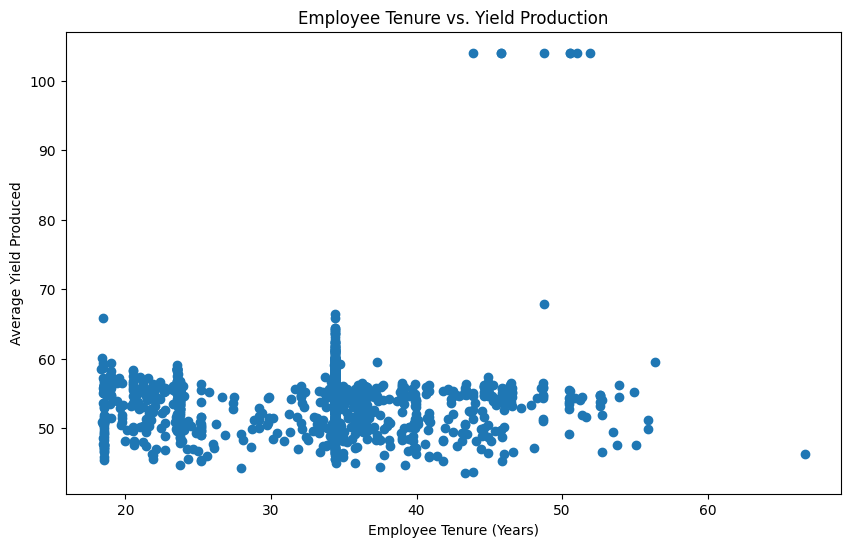

Top 10 Employees with the Highest Average Quantity Produced:
               tenure_years    quantity
employee_code                          
2727              51.893151  104.000000
11211             48.734247  104.000000
29593             51.035616  104.000000
37774             50.558904  104.000000
37875             50.558904  104.000000
38178             45.810959  104.000000
38784             43.890411  104.000000
40602             45.827397  104.000000
1094537           48.717808   67.833333
465206            34.383562   66.375000


In [27]:
# Convert the date_of_join column to datetime format
df_master_workdetails['date_of_join'] = pd.to_datetime(df_master_workdetails['date_of_join'])

# Get the current date
current_date = pd.to_datetime('today')

df_workdetails_yield = df_master_workdetails.copy()

# Calculate the tenure of each employee in years
df_workdetails_yield['tenure_years'] = (current_date - df_workdetails_yield['date_of_join']).dt.days / 365.0

# Group the data by employee_code and calculate the average quantity produced by each employee
grouped_employee = df_workdetails_yield.groupby('employee_code').agg({'tenure_years': 'first', 'quantity': 'mean'})

# Create a scatter plot to visualize the relationship between tenure and quantity produced
plt.figure(figsize=(10, 6))
plt.scatter(grouped_employee['tenure_years'], grouped_employee['quantity'])
plt.xlabel("Employee Tenure (Years)")
plt.ylabel("Average Yield Produced")
plt.title("Employee Tenure vs. Yield Production")
plt.show()

# Get the top 10 employees with the highest average quantity produced 
top_10_employees = grouped_employee.nlargest(10, 'quantity')

# Output the top 10 employees and their average quantity produced and tenure
print("Top 10 Employees with the Highest Average Quantity Produced:")
print(top_10_employees)

<H4>Determine the significance of the correlation between Employee Tenure and Yield Production</H4>

In [28]:
# Calculate the correlation between tenure and quantity produced
correlation, p_value = pearsonr(grouped_employee['tenure_years'], grouped_employee['quantity'])

print('\nCorrelation Coefficient:', correlation)
print('\nP-value:', p_value)

# Check if the correlation is statistically significant
if p_value < 0.05:  
    if correlation > 0:
        print('\nSignificant positive correlation between Employee Tenure and Yield Production')
    elif correlation < 0:
        print('\nSignificant negative correlation between Employee Tenure and Yield Production')
    else:
        print('\nNo significant correlation between Employee Tenure and Yield Production')
else:
    print('\nThe correlation is not statistically significant')


Correlation Coefficient: 0.11209690388969107

P-value: 9.023431097883646e-06

Significant positive correlation between Employee Tenure and Yield Production


<H3>Time Series Analysis  of Quarterly Yield Production by Division</H3>

The quantity column is considered to calculate the yield. The quantity produced is considered as a yield.

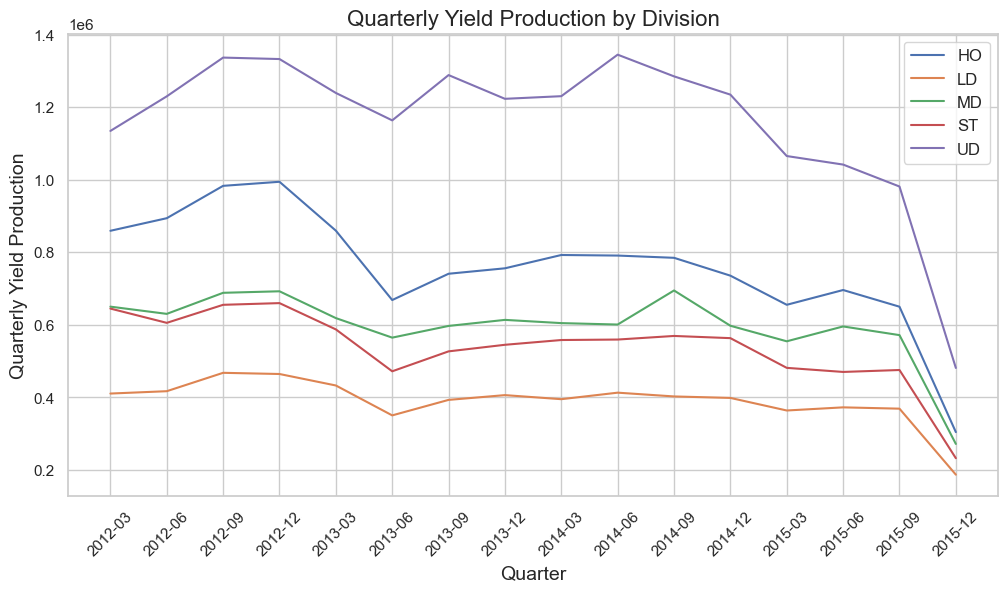

In [29]:
df_quarterly_division_yield = df_master_workdetails.copy()
# Convert the year and month columns to a Period object
df_quarterly_division_yield['quarter'] = pd.to_datetime(df_quarterly_division_yield['year'].astype(str) + '-' + 
                                                        df_quarterly_division_yield['month'].astype(str) + '-01').dt.to_period('Q') 

# Group the data by division and quarter, calculating the sum of quantity produced (yield)
quarterly_division_yield = df_quarterly_division_yield.groupby(['division', 'quarter'])['quantity'].sum().reset_index()

# Visualize the quarterly yield production by division using a line plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Iterate through each division
for division, data in quarterly_division_yield.groupby('division'):
    # Plot the quarterly yield production for each division
    plt.plot(data['quarter'].apply(lambda x: x.strftime('%Y-%m')), data['quantity'], label=division) 

plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Quarterly Yield Production', fontsize=14)
plt.title('Quarterly Yield Production by Division', fontsize=16)
plt.legend(loc='upper right', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<H3>Recognize the Relationship between Work Fraction and Gender</H3>

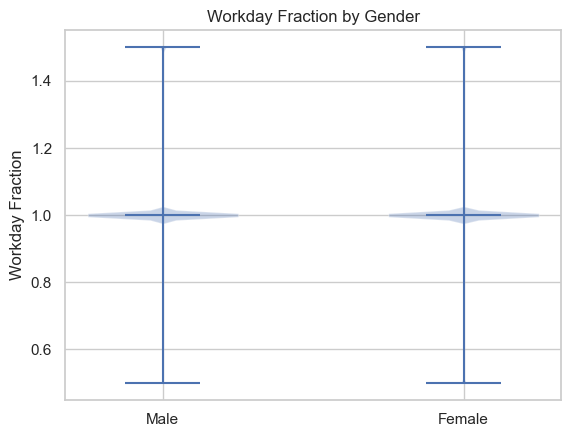

Male Workday Fraction Stats:
 count    312203.000000
mean          1.014260
std           0.095519
min           0.500000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.500000
Name: workday_fraction, dtype: float64
Female Workday Fraction Stats:
 count    731555.000000
mean          1.001028
std           0.118501
min           0.500000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.500000
Name: workday_fraction, dtype: float64


In [30]:
male_data = df_master_workdetails[df_master_workdetails['gender'] == 'M']
female_data = df_master_workdetails[df_master_workdetails['gender'] == 'F']

# Calculate the descriptive statistics for the workday_fraction column
male_stats = male_data['workday_fraction'].describe()
female_stats = female_data['workday_fraction'].describe()

# Visualize the workday_fraction vs gender relationship using a violin plot
plt.violinplot([male_data['workday_fraction'], female_data['workday_fraction']], showmedians=True)
plt.xticks([1, 2], ['Male', 'Female'])
plt.ylabel('Workday Fraction')
plt.title('Workday Fraction by Gender')
plt.show()

print("Male Workday Fraction Stats:\n", male_stats)
print("Female Workday Fraction Stats:\n", female_stats)

<H3>Recognize the Relationship between Employee Efficiency and Crop Type</H3>

<H4>Employee Effiecency Calcualtion</H4>

workday_fraction, quantity, and extra_kilos columns used to calculate employee efficiency.

employee_efficiency = (quantity + extra_kilos) / workday_fraction

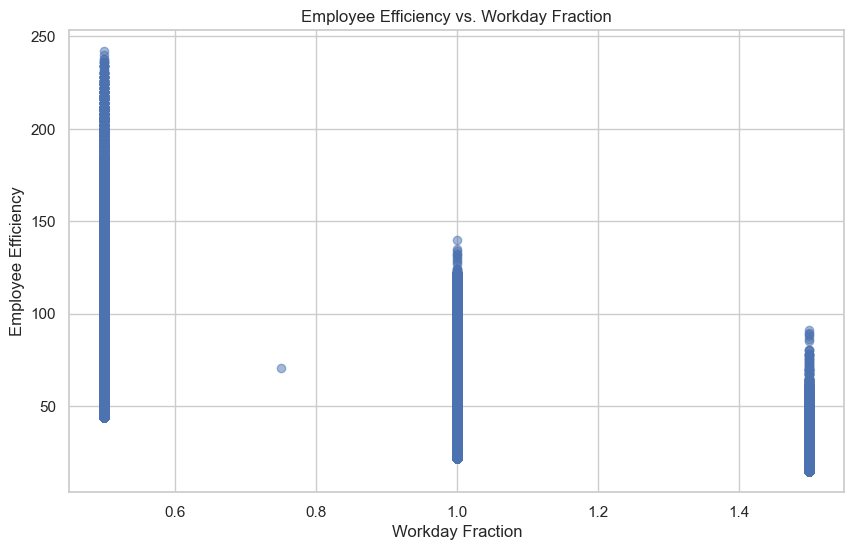

        employee_code  employee_efficiency
901339         579134                242.0
900802         419049                240.0
901871          84032                238.0
900786         524493                238.0
900195         563075                236.0
900194         547218                236.0
899597         583578                236.0
899591         440865                236.0
900174         425614                234.0
901274         459449                234.0


In [31]:
df_employee_efficiency = df_master_workdetails.copy()

# Calculate the employee efficiency by dividing the quantity produced by the workday fraction
df_employee_efficiency['employee_efficiency'] = (df_employee_efficiency['quantity'] + 
                                                 df_employee_efficiency['extra_kilos']) / df_employee_efficiency['workday_fraction']

# Visualize employee efficiency vs workday fraction using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_employee_efficiency['workday_fraction'], df_employee_efficiency['employee_efficiency'], alpha=0.5)
plt.title('Employee Efficiency vs. Workday Fraction')
plt.xlabel('Workday Fraction')
plt.ylabel('Employee Efficiency')
plt.show()

# Sort the DataFrame by employee_efficiency in descending order
df_employee_efficiency_sorted = df_employee_efficiency.sort_values(by='employee_efficiency', ascending=False)

# Retrieve the top 10 efficient employees
top_10_efficient_employees = df_employee_efficiency_sorted.head(10)

# Display the top 10 efficient employees and their efficiency scores
print(top_10_efficient_employees[['employee_code', 'employee_efficiency']])

<H3>Relationship between Employee Efficiency vs Crop Type</H3>

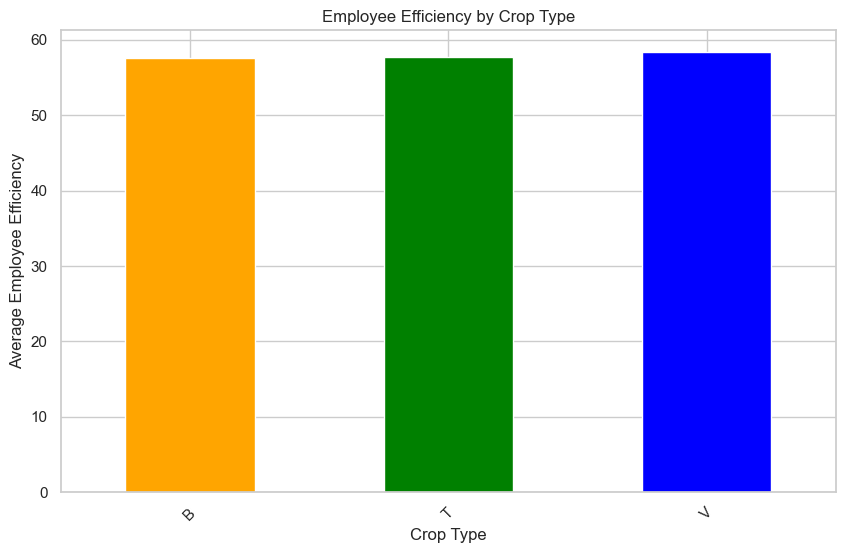

In [32]:
# Calculate average employee efficiency for each crop type
average_efficiency_by_crop = df_employee_efficiency.groupby('crop_type')['employee_efficiency'].mean()

# Create a bar chart to visualize the average employee efficiency by crop type
plt.figure(figsize=(10, 6))
average_efficiency_by_crop.plot(kind='bar', color=['orange', 'green', 'blue'])
plt.title('Employee Efficiency by Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Average Employee Efficiency')
plt.xticks(rotation=45)
plt.show() 

<H2>G) Methods for Creating Data Partitions</H2>

<H4>Hold-out Method</H4>
Predict the Future Yield Production (Quantity produced).

'quantity' is the target variable that wants to predict.

In [33]:
# Copy the df_master_workdetails DataFrame
df_workdetails_holdout = df_master_workdetails.copy()

# 'quantity' is the target variable you want to predict
X_holdout = df_workdetails_holdout.drop('quantity', axis=1)  # Features (all columns except 'quantity')
y_holdout = df_workdetails_holdout['quantity']  # Target variable

test_size = 0.20 # 20% of the data will be used for testing
random_state = 40 # Random state for reproducibility

# Partition the data into training and testing sets 
# 80% training and 20% testing data
X_holdout_train, X_holdout_test, y_holdout_train, y_holdout_test = train_test_split(
    X_holdout, y_holdout, test_size=test_size, random_state=random_state) 

# Display the shapes of the partitioned datasets
print("X_train shape:", X_holdout_train.shape)
print("X_test shape:", X_holdout_test.shape)
print("y_train shape:", y_holdout_train.shape)
print("y_test shape:", y_holdout_test.shape)

print(X_holdout_train.value_counts(normalize = True))
print(y_holdout_train.value_counts(normalize = True))
print(X_holdout_test.value_counts(normalize = True))
print(y_holdout_test.value_counts(normalize = True))

X_train shape: (835006, 17)
X_test shape: (208752, 17)
y_train shape: (835006,)
y_test shape: (208752,)
year  month  day  estate  division  employee_code  work_code  workday_fraction  extra_kilos  gender  date_of_join  pamact  crop_type  field  area  number_of_trees  type
2012  1      2    EST     HO        41107          PLK        1.0               0.0          F       1973-05-01    A       T          4CVP   2.0   26000.0          R       0.000002
2014  6      2    EST     UD        378952         EFD        1.0               0.0          M       1979-01-01    A       T          6B     0.8   9257.0           R       0.000002
                                    448238         PLK        1.0               17.0         F       1984-05-17    A       T          OTH    0.8   9257.0           O       0.000002
                                    445713         ABS        1.0               0.0          F       1983-10-06    A       T          6B     0.8   9257.0           R       0.000002
   

<H4>Bootstrap Method</H4>
Predict the Future Yield Production (Quantity produced).

'quantity' is the target variable that wants to predict.

Bootstrap Sample 1: Mean Quantity = 52.82076305043889, Std Quantity = 19.26700100538461
Bootstrap Sample 2: Mean Quantity = 52.82076305043889, Std Quantity = 19.26700100538461
Bootstrap Sample 3: Mean Quantity = 52.82076305043889, Std Quantity = 19.26700100538461
Bootstrap Sample 4: Mean Quantity = 52.82076305043889, Std Quantity = 19.26700100538461
Bootstrap Sample 5: Mean Quantity = 52.82076305043889, Std Quantity = 19.26700100538461
Bootstrap Sample 6: Mean Quantity = 52.82076305043889, Std Quantity = 19.26700100538461
Bootstrap Sample 7: Mean Quantity = 52.82076305043889, Std Quantity = 19.26700100538461
Bootstrap Sample 8: Mean Quantity = 52.82076305043889, Std Quantity = 19.26700100538461
Bootstrap Sample 9: Mean Quantity = 52.82076305043889, Std Quantity = 19.26700100538461
Bootstrap Sample 10: Mean Quantity = 52.82076305043889, Std Quantity = 19.26700100538461


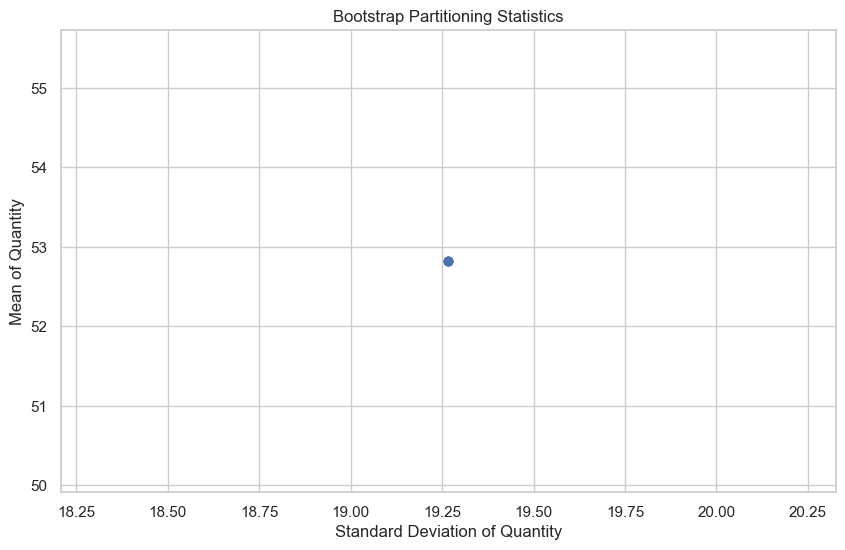

In [34]:
# Copy the df_master_workdetails DataFrame
df_workdetails_bootstrap = df_master_workdetails.copy()

# Number of Bootstrap Samples
num_samples = 10

# List to store the bootstrap samples
bootstrap_samples = [] 
# Create lists to store the mean and standard deviation of each bootstrap sample
mean_quantities = []
std_quantities = []

# Set a random seed for reproducibility
random_seed = 42

# Function to compute summary statistics for each bootstrap sample
def calc_summary(bootstrap_sample):
    # Calculate the mean and standard deviation of the 'quantity' column
    mean_quantity = bootstrap_sample['quantity'].mean()
    std_quantity = bootstrap_sample['quantity'].std()

    return mean_quantity, std_quantity

for i in range(num_samples):
    # Create a bootstrap sample using the sample() method
    bootstrap_sample = df_workdetails_bootstrap.sample(n=len(df_workdetails_bootstrap), replace=True, random_state=random_seed)
    bootstrap_samples.append(bootstrap_sample)
    
    # Get the summary statistics of the bootstrap sample
    mean_quantity, std_quantity = calc_summary(bootstrap_sample)

     # Append the mean and standard deviation to the respective lists
    mean_quantities.append(mean_quantity)
    std_quantities.append(std_quantity)

    print(f"Bootstrap Sample {i+1}: Mean Quantity = {mean_quantity}, Std Quantity = {std_quantity}")

plt.figure(figsize=(10, 6))
plt.scatter(std_quantities, mean_quantities, alpha=0.5)
plt.title("Bootstrap Partitioning Statistics")
plt.xlabel("Standard Deviation of Quantity")
plt.ylabel("Mean of Quantity")
plt.show()


<H2>H & I) Training a Model and Testing the Data</H2>

<H2>J) Evaluate and Improve the Machine Learning Models</H2>

<H2>K) Patern Identification and Visulization</H2>

All these assignment sections are covered in the below codes, including machine-learning model development, evaluation and improvement tasks.

<H3>1) Artificial Neural Network (ANN)</H3>

<H4>Data pre-processing for ANN ML model development.</H4>

In [35]:
"""
Data Preprocessing
"""
# Copy the df_master_workdetails DataFrame by selected coleumns
df_workdetails_ann = df_master_workdetails.copy()

df_workdetails_ann.drop(['employee_code', 'work_code', 'workday_fraction', 
                        'estate', 'field', 'type', 'pamact', 'date_of_join', 'extra_kilos', 'area', 'number_of_trees'], axis=1, inplace=True)

# Encode categorical variables using one-hot encoding
categorical_columns = ['division', 'gender', 'crop_type']
df_workdetails_ann = pd.get_dummies(df_workdetails_ann, columns=categorical_columns)
print(df_workdetails_ann.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043758 entries, 0 to 1043757
Data columns (total 14 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   year         1043758 non-null  int64  
 1   month        1043758 non-null  int64  
 2   day          1043758 non-null  int64  
 3   quantity     1043758 non-null  float64
 4   division_HO  1043758 non-null  bool   
 5   division_LD  1043758 non-null  bool   
 6   division_MD  1043758 non-null  bool   
 7   division_ST  1043758 non-null  bool   
 8   division_UD  1043758 non-null  bool   
 9   gender_F     1043758 non-null  bool   
 10  gender_M     1043758 non-null  bool   
 11  crop_type_B  1043758 non-null  bool   
 12  crop_type_T  1043758 non-null  bool   
 13  crop_type_V  1043758 non-null  bool   
dtypes: bool(10), float64(1), int64(3)
memory usage: 41.8 MB
None


<H4>Data partitioning using Hold-out Method.</H4>

The hold-out method is selected for data partitioning, and the Hold-out method partitioned the dataset into train and test data for use in the model development.

In [36]:
# 'quantity' is the target variable that want to predict
X_holdout = df_workdetails_ann.drop(['quantity'], axis=1) # Features variables
y_holdout = df_workdetails_ann['quantity']  # Target variable

test_size = 0.20 # 20% of the data will be used for testing
random_state = 40 # Random state for reproducibility

# Partition the data into training and testing sets 
# 80% training and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(
    X_holdout, y_holdout, test_size=test_size, random_state=random_state) 

# Display the shapes of the partitioned datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (835006, 13)
X_test shape: (208752, 13)
y_train shape: (835006,)
y_test shape: (208752,)


Data Pre-processing is performed before developing the ANN model.

Used TensorFlow library to build and train the model.
<H4> ANN Model Development and Train</H4>

Epoch 1/10
41751/41751 [==============================] - 21s 489us/step - loss: 409.8204 - val_loss: 368.5093
Epoch 2/10
41751/41751 [==============================] - 20s 478us/step - loss: 369.9939 - val_loss: 367.7743
Epoch 3/10
41751/41751 [==============================] - 20s 486us/step - loss: 369.4209 - val_loss: 367.3640
Epoch 4/10
41751/41751 [==============================] - 20s 480us/step - loss: 369.1833 - val_loss: 367.3932
Epoch 5/10
41751/41751 [==============================] - 20s 476us/step - loss: 369.1117 - val_loss: 367.5768
Epoch 6/10
41751/41751 [==============================] - 20s 468us/step - loss: 369.1269 - val_loss: 368.2337
Epoch 7/10
41751/41751 [==============================] - 20s 469us/step - loss: 368.9586 - val_loss: 369.4965
Epoch 8/10
41751/41751 [==============================] - 20s 471us/step - loss: 368.9031 - val_loss: 377.4376
Epoch 9/10
41751/41751 [==============================] - 20s 470us/step - loss: 368.8763 - val_loss: 367.5301
E

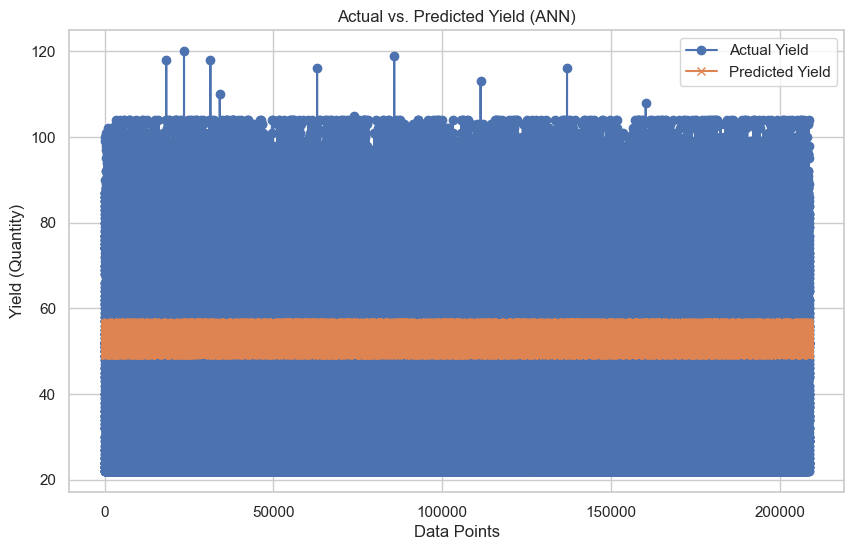

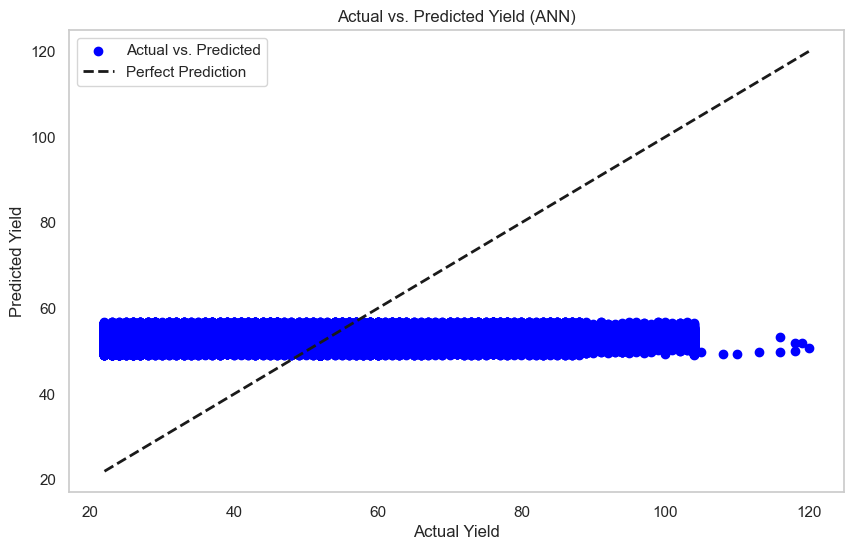

In [37]:
"""
Define and train the ANN model
"""

# Convert the input data to a compatible format
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

# Define the model architecture
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer with a single neuron for regression
])

# Compile the model using the Adam optimizer and the Mean Squared Error (MSE) loss function
model.compile(optimizer='adam', loss='mean_squared_error')
# Fit the model on the training data for 5 epochs
model.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.2)
# model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0)

# Evaluate the model on the test data
y_pred = model.predict(X_test)

# Model evaluation metrics
# Calculate the mean absolute error (MAE) and the mean squared error (MSE),  
# R-squared score and Root Mean Squared Error (RMSE)
mean_abs_error = mean_absolute_error(y_test, y_pred)
mean_sqd_error = mean_squared_error(y_test, y_pred)
r_sqd_score = r2_score(y_test, y_pred)
root_mean_sqd_error = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error: {mean_abs_error}")
print(f"Mean Squared Error: {mean_sqd_error}")
print(f"R-squared (R2): {r_sqd_score}")
print(f"Root Mean Squared Error: {root_mean_sqd_error}")

# Visualize the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label='Actual Yield', marker='o')
plt.plot(range(len(y_test)), y_pred, label='Predicted Yield', marker='x')
plt.xlabel('Data Points')
plt.ylabel('Yield (Quantity)')
plt.title('Actual vs. Predicted Yield (ANN)')
plt.legend()
plt.show()

# Plot the scatterplot for actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, c='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs. Predicted Yield (ANN)')
plt.legend(loc='best')
plt.grid()
plt.show()

<H4>Residual Plots for ANN<H4/>

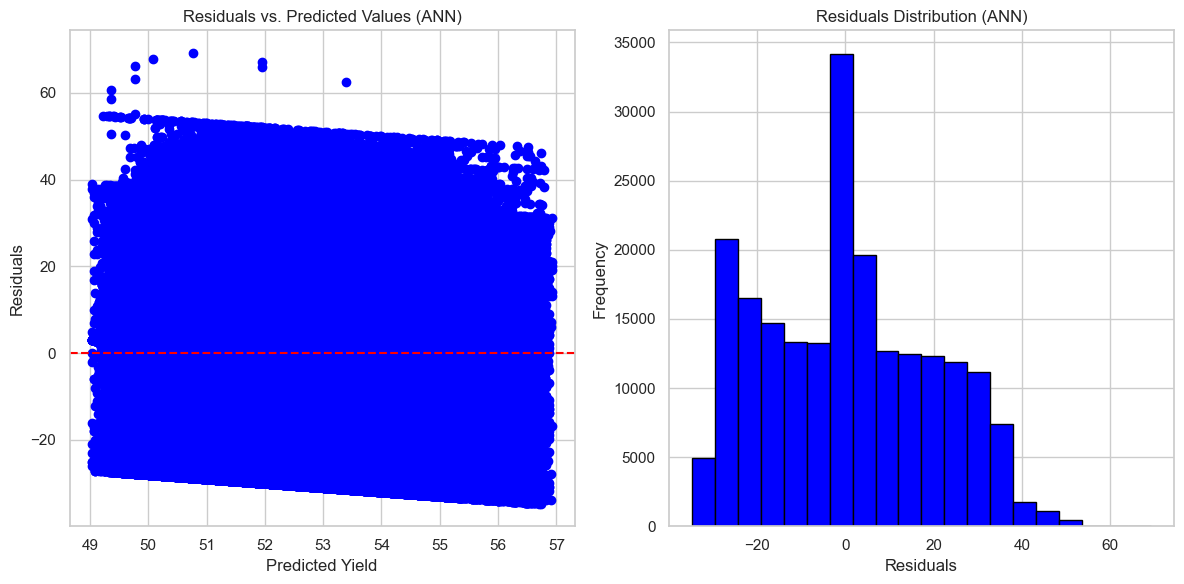

In [38]:
# Calculate residuals (the differences between actual and predicted values)
residuals = y_test - y_pred.flatten()

# Create residual plots
plt.figure(figsize=(12, 6))

# Residuals vs. Predicted Values
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, c='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Yield')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values (ANN)')

# Residuals Distribution
plt.subplot(1, 2, 2)
plt.hist(residuals, bins=20, color='blue', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution (ANN)')

plt.tight_layout()
plt.show()

<H3>Improve the ANN Model Performance</H4>

Use the Scaling/Normalization method called Z-Score Normalization to improve the ANN model.

Epoch 1/10
41751/41751 [==============================] - 20s 468us/step - loss: 374.9571 - val_loss: 366.6966
Epoch 2/10
41751/41751 [==============================] - 20s 480us/step - loss: 367.2883 - val_loss: 365.7149
Epoch 3/10
41751/41751 [==============================] - 21s 493us/step - loss: 366.2930 - val_loss: 364.0905
Epoch 4/10
41751/41751 [==============================] - 21s 494us/step - loss: 365.3307 - val_loss: 364.0157
Epoch 5/10
41751/41751 [==============================] - 20s 483us/step - loss: 364.6268 - val_loss: 365.3874
Epoch 6/10
41751/41751 [==============================] - 20s 476us/step - loss: 364.1708 - val_loss: 362.6218
Epoch 7/10
41751/41751 [==============================] - 20s 486us/step - loss: 363.9283 - val_loss: 362.6774
Epoch 8/10
41751/41751 [==============================] - 20s 480us/step - loss: 363.6547 - val_loss: 362.4563
Epoch 9/10
41751/41751 [==============================] - 20s 473us/step - loss: 363.3060 - val_loss: 362.2202
E

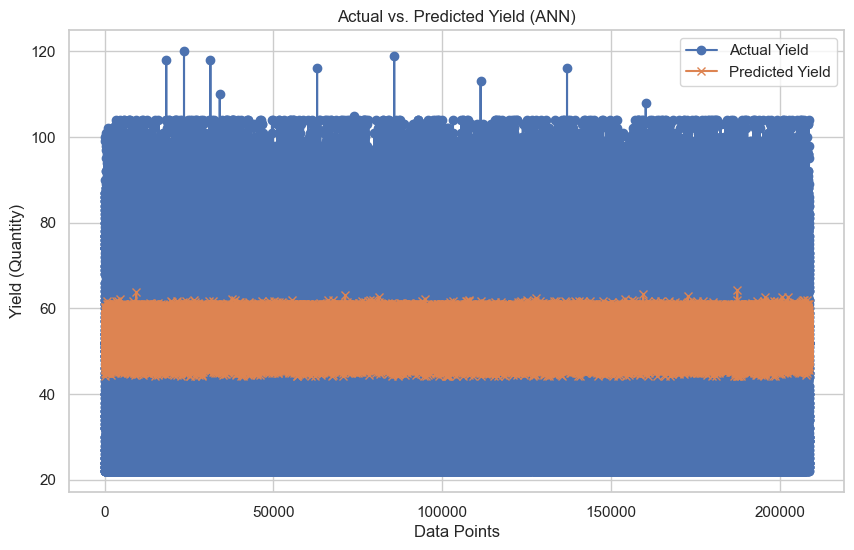

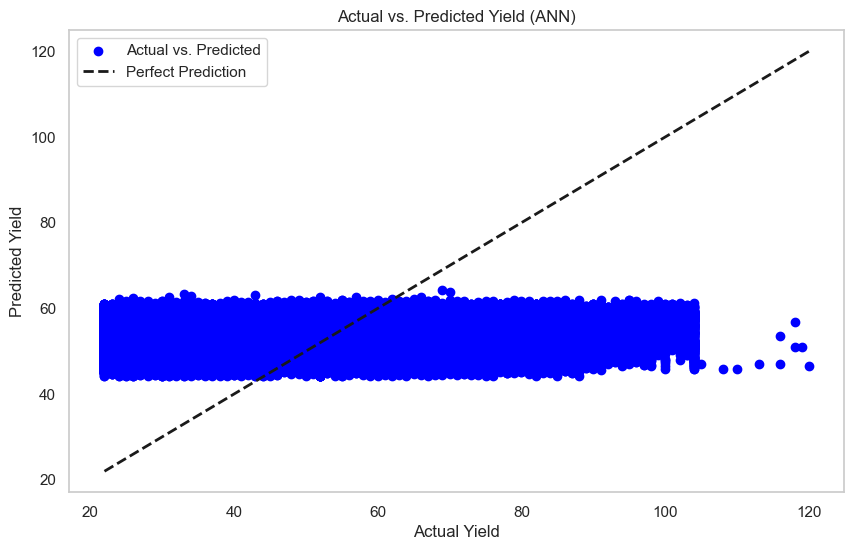

In [39]:
# Normalize the features using Z-score normalization (StandardScaler)
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Define the model architecture
model = keras.Sequential([
    layers.Input(shape=(X_train_normalized.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer with a single neuron for regression
])

# Compile the model using the Adam optimizer and the Mean Squared Error (MSE) loss function
model.compile(optimizer='adam', loss='mean_squared_error')
# Fit the model on the training data for 5 epochs
model.fit(X_train_normalized, y_train, epochs=10, batch_size=16, validation_split=0.2)
# model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0)

# Evaluate the model on the test data
y_pred_new = model.predict(X_test_normalized)

# Model evaluation metrics
# Calculate the mean absolute error (MAE) and the mean squared error (MSE) 
# R-squared score and root mean squared error
mean_abs_error = mean_absolute_error(y_test, y_pred_new)
mean_sqd_error = mean_squared_error(y_test, y_pred_new)
r_sqd_score = r2_score(y_test, y_pred_new)
root_mean_sqd_error = np.sqrt(mean_squared_error(y_test, y_pred_new))

print(f"Mean Absolute Error: {mean_abs_error}")
print(f"Mean Squared Error: {mean_sqd_error}")
print(f"R-squared (R2): {r_sqd_score}")
print(f"Root Mean Squared Error: {root_mean_sqd_error}")

# Visualize the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label='Actual Yield', marker='o')
plt.plot(range(len(y_test)), y_pred_new, label='Predicted Yield', marker='x')
plt.xlabel('Data Points')
plt.ylabel('Yield (Quantity)')
plt.title('Actual vs. Predicted Yield (ANN)')
plt.legend()
plt.show()

# Plot the scatterplot for actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_new, c='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs. Predicted Yield (ANN)')
plt.legend(loc='best')
plt.grid()
plt.show()

<H4>Residual Plots for ANN after Model Improvement<H4/>

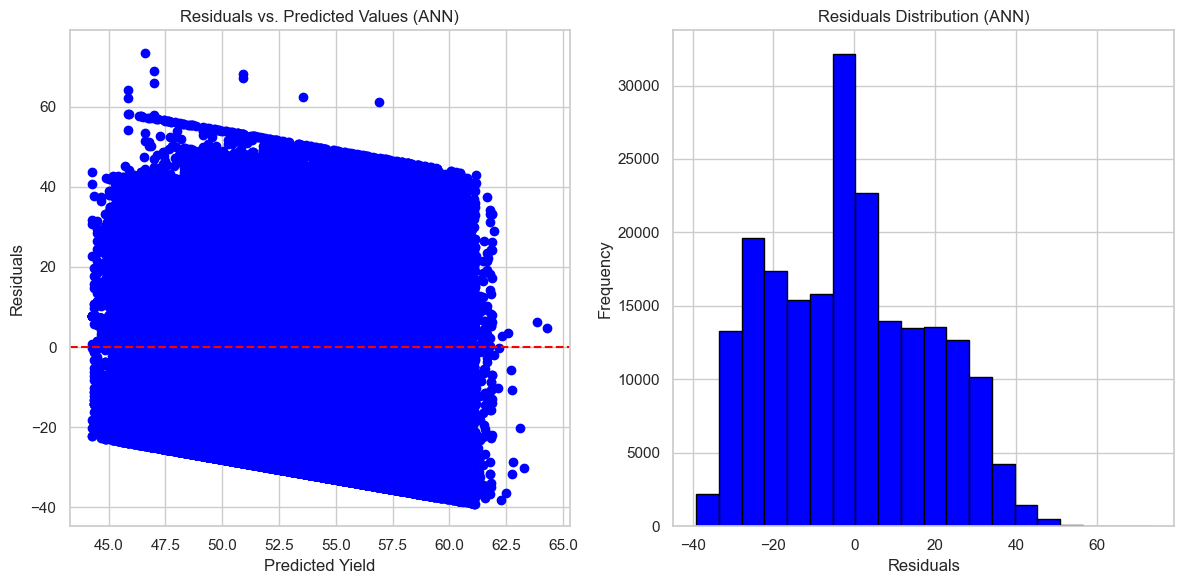

In [40]:
# Calculate residuals (the differences between actual and predicted values)
residuals = y_test - y_pred_new.flatten()

# Create residual plots
plt.figure(figsize=(12, 6))

# Residuals vs. Predicted Values
plt.subplot(1, 2, 1)
plt.scatter(y_pred_new, residuals, c='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Yield')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values (ANN)')

# Residuals Distribution
plt.subplot(1, 2, 2)
plt.hist(residuals, bins=20, color='blue', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution (ANN)')

plt.tight_layout()
plt.show()

<H3>2) Multiple Linear Regression (MLR)</H3>

<H4>Data pre-processing for MLR ML model development</H4>

In [41]:
"""
Data Preprocessing
"""
# Copy the df_master_workdetails DataFrame by selected coleumns
df_workdetails_mlr = df_master_workdetails.copy()

df_workdetails_mlr.drop(['employee_code', 'work_code', 'workday_fraction', 
                        'estate', 'field', 'type', 'pamact', 'date_of_join', 'extra_kilos', 'area', 'number_of_trees'], axis=1, inplace=True)

# Encode categorical variables using one-hot encoding
categorical_columns = ['division', 'gender', 'crop_type']
df_workdetails_mlr = pd.get_dummies(df_workdetails_mlr, columns=categorical_columns)
print(df_workdetails_mlr.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043758 entries, 0 to 1043757
Data columns (total 14 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   year         1043758 non-null  int64  
 1   month        1043758 non-null  int64  
 2   day          1043758 non-null  int64  
 3   quantity     1043758 non-null  float64
 4   division_HO  1043758 non-null  bool   
 5   division_LD  1043758 non-null  bool   
 6   division_MD  1043758 non-null  bool   
 7   division_ST  1043758 non-null  bool   
 8   division_UD  1043758 non-null  bool   
 9   gender_F     1043758 non-null  bool   
 10  gender_M     1043758 non-null  bool   
 11  crop_type_B  1043758 non-null  bool   
 12  crop_type_T  1043758 non-null  bool   
 13  crop_type_V  1043758 non-null  bool   
dtypes: bool(10), float64(1), int64(3)
memory usage: 41.8 MB
None


<H4>Data Partitioning for MLR ML model development</H4>

The hold-out method is selected for data partitioning, and the Hold-out method partitioned the dataset into train and test data for use in the model development.

In [42]:
# 'quantity' is the target variable that want to predict
X_mlr_holdout = df_workdetails_mlr.drop(['quantity'], axis=1) # Features variables
y_mlr_holdout = df_workdetails_mlr['quantity']  # Target variable

test_size = 0.20 # 20% of the data will be used for testing
random_state = 42 # Random state for reproducibility

# Partition the data into training and testing sets 
# 80% training and 20% testing data
X_mlr_train, X_mlr_test, y_mlr_train, y_mlr_test = train_test_split(
    X_mlr_holdout, y_mlr_holdout, test_size=test_size, random_state=random_state) 

# Display the shapes of the partitioned datasets
print("X_train shape:", X_mlr_train.shape)
print("X_test shape:", X_mlr_test.shape)
print("y_train shape:", y_mlr_train.shape)
print("y_test shape:", y_mlr_test.shape)

X_train shape: (835006, 13)
X_test shape: (208752, 13)
y_train shape: (835006,)
y_test shape: (208752,)


Data Pre-processing is performed before developing the MLR model.

Import the LinearRegression from sklearn.linear_model library.

<H4> MLR Model Development and Train</H4>

6524/6524 [==============================] - 2s 295us/step
Mean Absolute Error: 10106.55859375
Mean Squared Error: 102143696.0
R-squared (R2): -275183.8174145177
Root Mean Squared Error: 10106.6162109375


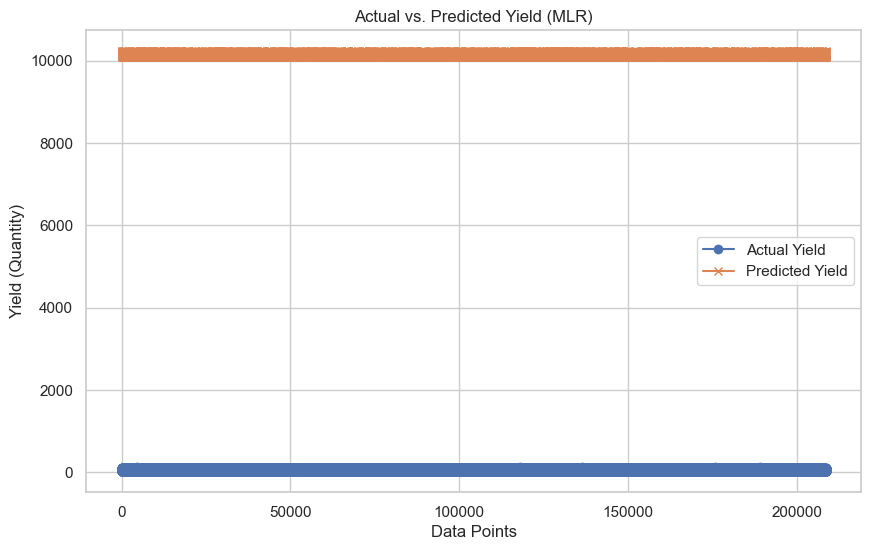

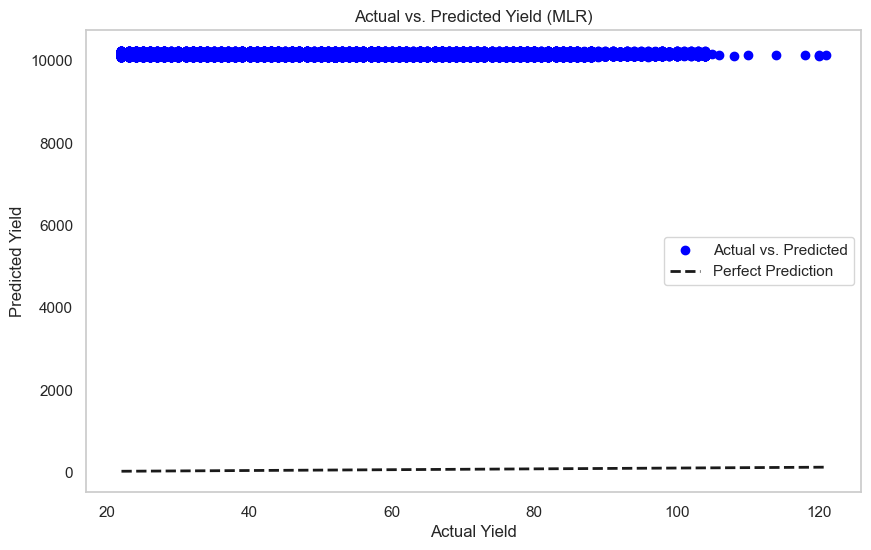

In [43]:
"""
Define and train the MLR model
"""

# Convert the input data to a compatible format
X_mlr_train = tf.convert_to_tensor(X_mlr_train, dtype=tf.float32)
y_mlr_train = tf.convert_to_tensor(y_mlr_train, dtype=tf.float32)
X_mlr_test = tf.convert_to_tensor(X_mlr_test, dtype=tf.float32)
y_mlr_test = tf.convert_to_tensor(y_mlr_test, dtype=tf.float32)

# Multiple Linear Regression model using scikit-learn
mlr_model = LinearRegression()
mlr_model.fit(X_mlr_train, y_mlr_train)

# Predict the yield on the testing set using the MLR model
y_mlr_pred = model.predict(X_mlr_test)

# Evaluation metrics for the MLR model 
mean_abs_error = mean_absolute_error(y_mlr_test, y_mlr_pred)
mean_sqd_error = mean_squared_error(y_mlr_test, y_mlr_pred)
r_sqd_score = r2_score(y_mlr_test, y_mlr_pred)
root_mean_sqd_error = np.sqrt(mean_sqd_error)

# Print the evaluation metrics for the MLR model
print(f"Mean Absolute Error: {mean_abs_error}")
print(f"Mean Squared Error: {mean_sqd_error}")
print(f"R-squared (R2): {r_sqd_score}")
print(f"Root Mean Squared Error: {root_mean_sqd_error}")

# Visualize the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_mlr_test)), y_mlr_test, label='Actual Yield', marker='o')
plt.plot(range(len(y_mlr_test)), y_mlr_pred, label='Predicted Yield', marker='x')
plt.xlabel('Data Points')
plt.ylabel('Yield (Quantity)')
plt.title('Actual vs. Predicted Yield (MLR)')
plt.legend()
plt.show()

# Plot the scatterplot for actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_mlr_test, y_mlr_pred, c='blue', label='Actual vs. Predicted')
plt.plot([min(y_mlr_test), max(y_mlr_test)], [min(y_mlr_test), max(y_mlr_test)], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs. Predicted Yield (MLR)')
plt.legend(loc='best')
plt.grid()
plt.show()

<H4>Residual Plots for MLR<H4/>

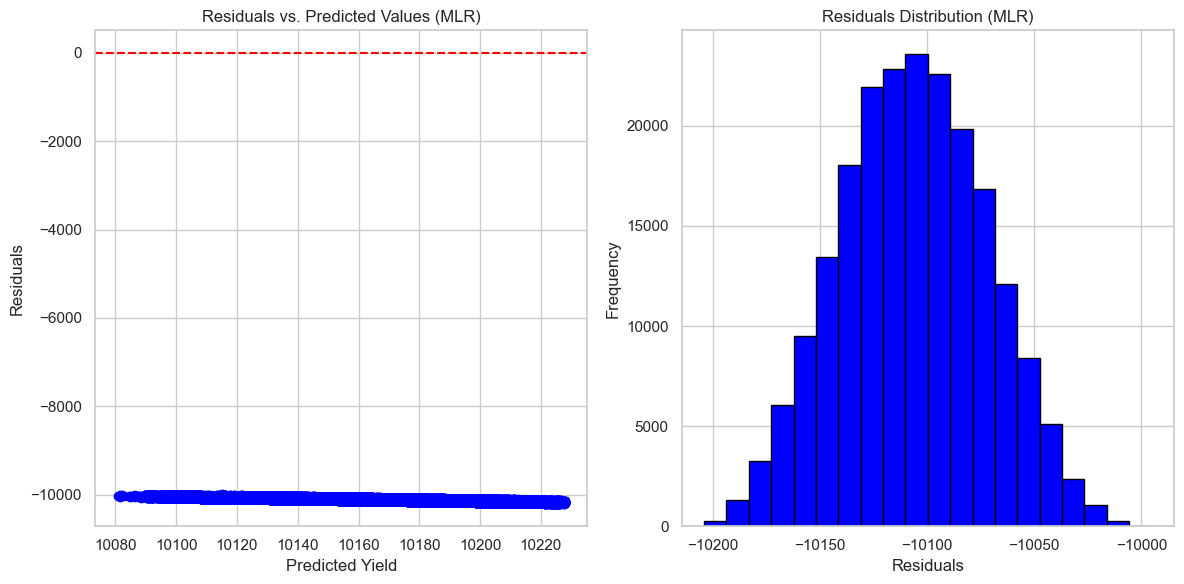

In [44]:
# Calculate residuals (the differences between actual and predicted values)
residuals = y_mlr_test - y_mlr_pred.flatten()

# Create residual plots
plt.figure(figsize=(12, 6))

# Residuals vs. Predicted Values
plt.subplot(1, 2, 1)
plt.scatter(y_mlr_pred, residuals, c='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Yield')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values (MLR)')

# Residuals Distribution
plt.subplot(1, 2, 2)
plt.hist(residuals, bins=20, color='blue', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution (MLR)')

plt.tight_layout()
plt.show()

<H3>Improve the MLR Model Performance</H4>

Use the Scaling/Normalization method called Z-Score Normalization to improve the MLR model.

6524/6524 [==============================] - 2s 297us/step
Mean Absolute Error: 15.662680625915527
Mean Squared Error: 363.1114501953125
R-squared (R2): 0.021743381705869314
Root Mean Squared Error: 19.055482864379883


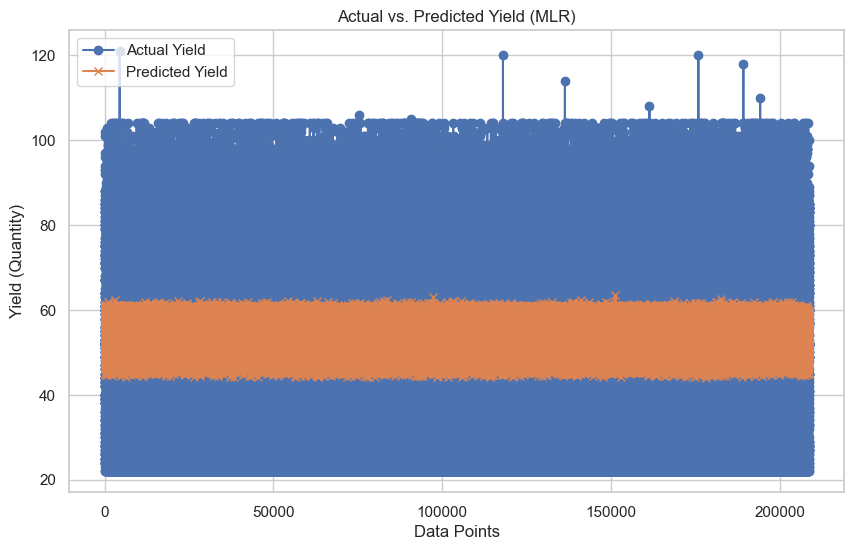

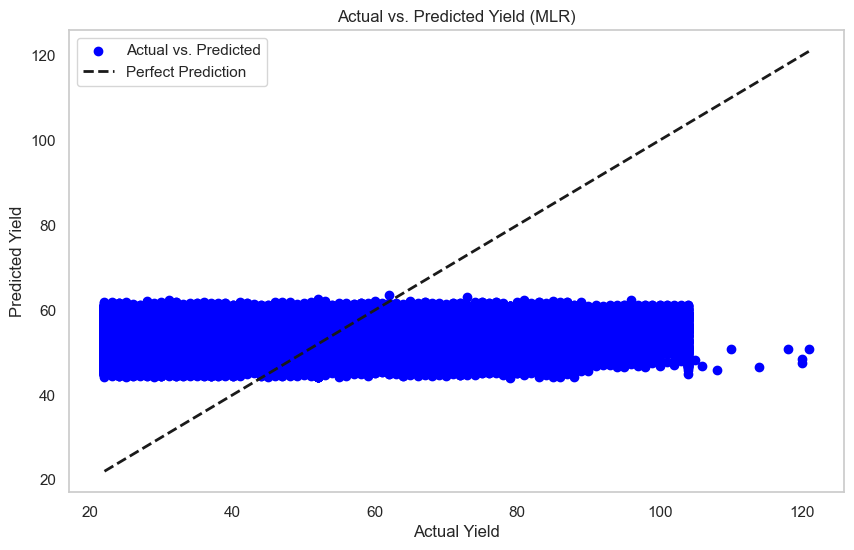

In [45]:
"""
Improve the MLR Model
"""

# Convert the input data to a compatible format
X_mlr_train = tf.convert_to_tensor(X_mlr_train, dtype=tf.float32)
y_mlr_train = tf.convert_to_tensor(y_mlr_train, dtype=tf.float32)
X_mlr_test = tf.convert_to_tensor(X_mlr_test, dtype=tf.float32)
y_mlr_test = tf.convert_to_tensor(y_mlr_test, dtype=tf.float32)

# Normalize the features using Z-score normalization (StandardScaler)
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_normalized_mlr = scaler.fit_transform(X_mlr_train)
X_test_normalized_mlr = scaler.transform(X_mlr_test)

# Multiple Linear Regression model using scikit-learn
mlr_model = LinearRegression()
mlr_model.fit(X_train_normalized_mlr, y_mlr_train)

# Predict the yield on the testing set using the MLR model
y_mlr_pred_new = model.predict(X_test_normalized_mlr)

# Evaluation metrics for the MLR model 
mean_abs_error = mean_absolute_error(y_mlr_test, y_mlr_pred_new)
mean_sqd_error = mean_squared_error(y_mlr_test, y_mlr_pred_new)
r_sqd_score = r2_score(y_mlr_test, y_mlr_pred_new)
root_mean_sqd_error = np.sqrt(mean_sqd_error)

# Print the evaluation metrics for the MLR model
print(f"Mean Absolute Error: {mean_abs_error}")
print(f"Mean Squared Error: {mean_sqd_error}")
print(f"R-squared (R2): {r_sqd_score}")
print(f"Root Mean Squared Error: {root_mean_sqd_error}")

#Visualize the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_mlr_test)), y_mlr_test, label='Actual Yield', marker='o')
plt.plot(range(len(y_mlr_test)), y_mlr_pred_new, label='Predicted Yield', marker='x')
plt.xlabel('Data Points')
plt.ylabel('Yield (Quantity)')
plt.title('Actual vs. Predicted Yield (MLR)')
plt.legend()
plt.show()

# Plot the scatterplot for actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_mlr_test, y_mlr_pred_new, c='blue', label='Actual vs. Predicted')
plt.plot([min(y_mlr_test), max(y_mlr_test)], [min(y_mlr_test), max(y_mlr_test)], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs. Predicted Yield (MLR)')
plt.legend(loc='best')
plt.grid()
plt.show()


<H4>Residual Plots for MLR after Model Improvement<H4/>

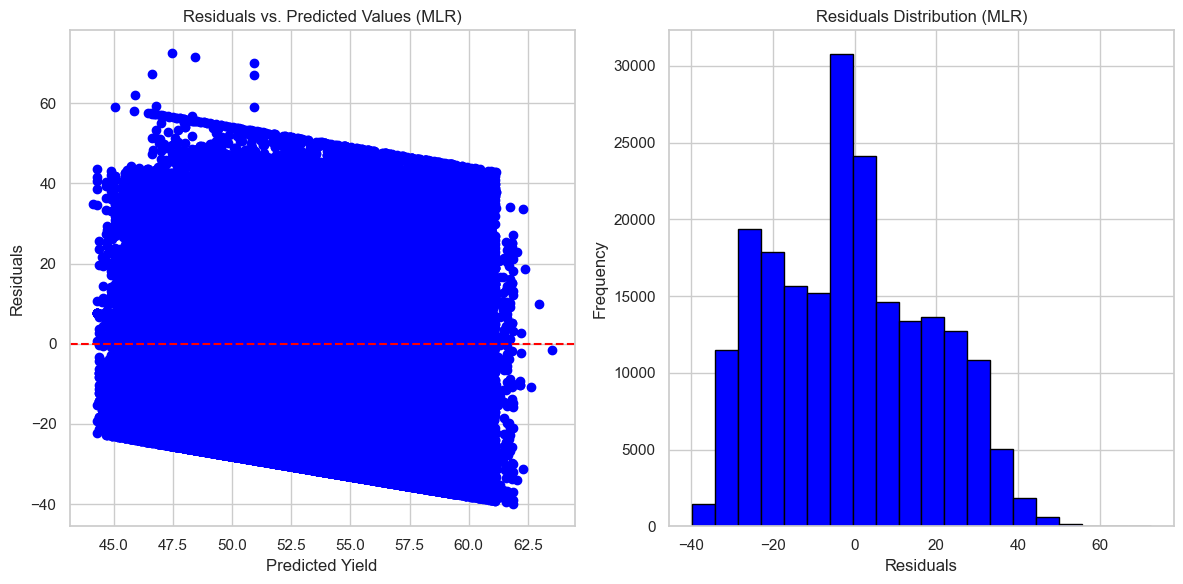

In [46]:
# Calculate residuals (the differences between actual and predicted values)
residuals = y_mlr_test - y_mlr_pred_new.flatten()

# Create residual plots
plt.figure(figsize=(12, 6))

# Residuals vs. Predicted Values
plt.subplot(1, 2, 1)
plt.scatter(y_mlr_pred_new, residuals, c='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Yield')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values (MLR)')

# Residuals Distribution
plt.subplot(1, 2, 2)
plt.hist(residuals, bins=20, color='blue', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution (MLR)')

plt.tight_layout()
plt.show()

<H3>3) Decision Trees (DT)</H3>

<H4>Data pre-processing for DT ML model development</H4>

In [47]:
"""
Data Preprocessing
"""
# Copy the df_master_workdetails DataFrame by selected coleumns
df_workdetails_dt = df_master_workdetails.copy()

df_workdetails_dt.drop(['employee_code', 'work_code', 'workday_fraction', 
                        'estate', 'field', 'type', 'pamact', 'date_of_join', 'extra_kilos', 'area', 'number_of_trees'], axis=1, inplace=True)

# Encode categorical variables using one-hot encoding
categorical_columns = ['division', 'gender', 'crop_type']
df_workdetails_dt = pd.get_dummies(df_workdetails_dt, columns=categorical_columns)
print(df_workdetails_dt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043758 entries, 0 to 1043757
Data columns (total 14 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   year         1043758 non-null  int64  
 1   month        1043758 non-null  int64  
 2   day          1043758 non-null  int64  
 3   quantity     1043758 non-null  float64
 4   division_HO  1043758 non-null  bool   
 5   division_LD  1043758 non-null  bool   
 6   division_MD  1043758 non-null  bool   
 7   division_ST  1043758 non-null  bool   
 8   division_UD  1043758 non-null  bool   
 9   gender_F     1043758 non-null  bool   
 10  gender_M     1043758 non-null  bool   
 11  crop_type_B  1043758 non-null  bool   
 12  crop_type_T  1043758 non-null  bool   
 13  crop_type_V  1043758 non-null  bool   
dtypes: bool(10), float64(1), int64(3)
memory usage: 41.8 MB
None


<H4>Data Partitioning for DT ML model development</H4>

The hold-out method is selected for data partitioning, and the Hold-out method partitioned the dataset into train and test data for use in the model development.

In [48]:
# 'quantity' is the target variable that want to predict
X_dt_holdout = df_workdetails_dt.drop(['quantity'], axis=1) # Features variables
y_dt_holdout = df_workdetails_dt['quantity']  # Target variable

test_size = 0.20 # 20% of the data will be used for testing
random_state = 42 # Random state for reproducibility

# Partition the data into training and testing sets 
# 80% training and 20% testing data
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(
    X_dt_holdout, y_dt_holdout, test_size=test_size, random_state=random_state) 

# Display the shapes of the partitioned datasets
print("X_train shape:", X_train_dt.shape)
print("X_test shape:", X_test_dt.shape)
print("y_train shape:", y_train_dt.shape)
print("y_test shape:", y_test_dt.shape)

X_train shape: (835006, 13)
X_test shape: (208752, 13)
y_train shape: (835006,)
y_test shape: (208752,)


Data Pre-processing is performed before developing the DT model.

Import DecisionTreeRegressor from sklearn.tree library

<H4> DT Model Development and Train</H4>

Mean Absolute Error: 15.565891307959632
Mean Squared Error: 362.8812441138522
R-squared (R2): 0.022363507080712774
Root Mean Squared Error: 19.049442094556266


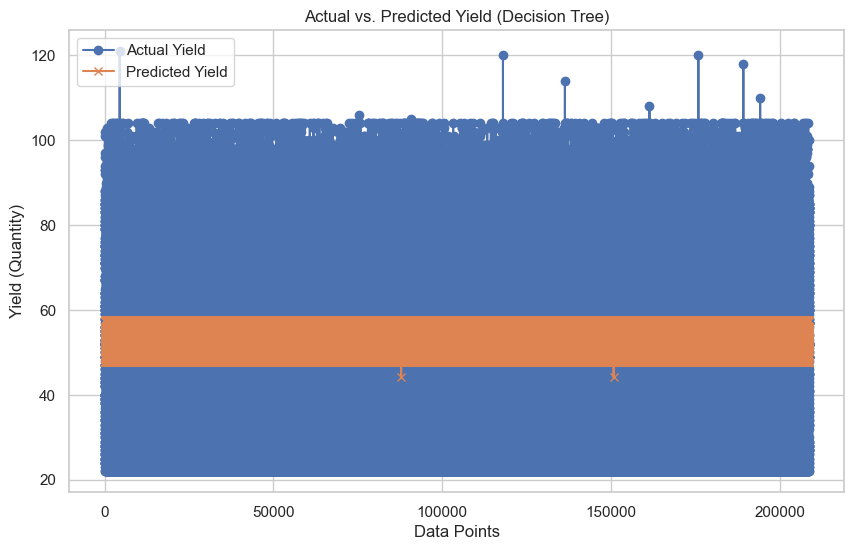

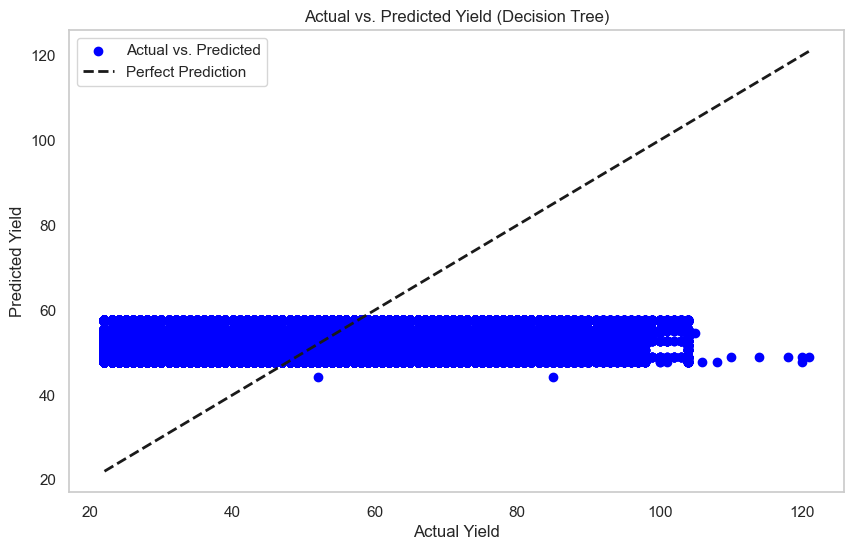

In [49]:
"""
Develop DT ML Model
"""

# Convert the input data to a compatible format
X_train_dt = tf.convert_to_tensor(X_train_dt, dtype=tf.float32)
y_train_dt = tf.convert_to_tensor(y_train_dt, dtype=tf.float32)
X_test_dt = tf.convert_to_tensor(X_test_dt, dtype=tf.float32)
y_test_dt = tf.convert_to_tensor(y_test_dt, dtype=tf.float32)

# Create a decision tree regressor with a maximum depth of 5
dt_regressor = DecisionTreeRegressor(max_depth=5)  # Adjust the depth as needed to improve the model

# Fit the regressor to the training data 
dt_regressor.fit(X_train_dt, y_train_dt)

# Make predictions on the test data using the trained decision tree
y_pred_dt = dt_regressor.predict(X_test_dt)

# Evaluation metrics for the DT model 
mean_abs_error = mean_absolute_error(y_test_dt, y_pred_dt)
mean_sqd_error = mean_squared_error(y_test_dt, y_pred_dt)
r_sqd_score = r2_score(y_test_dt, y_pred_dt)
root_mean_sqd_error = np.sqrt(mean_sqd_error)

# Print the evaluation metrics for the DT model
print(f"Mean Absolute Error: {mean_abs_error}")
print(f"Mean Squared Error: {mean_sqd_error}")
print(f"R-squared (R2): {r_sqd_score}")
print(f"Root Mean Squared Error: {root_mean_sqd_error}")

#Visualize the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test_dt)), y_test_dt, label='Actual Yield', marker='o')
plt.plot(range(len(y_test_dt)), y_pred_dt, label='Predicted Yield', marker='x')
plt.xlabel('Data Points')
plt.ylabel('Yield (Quantity)')
plt.title('Actual vs. Predicted Yield (Decision Tree)')
plt.legend()
plt.show()

# Plot the scatterplot for actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_dt, y_pred_dt, c='blue', label='Actual vs. Predicted')
plt.plot([min(y_test_dt), max(y_test_dt)], [min(y_test_dt), max(y_test_dt)], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs. Predicted Yield (Decision Tree)')
plt.legend(loc='best')
plt.grid()
plt.show()


<H4>Residual Plots for DT<H4/>

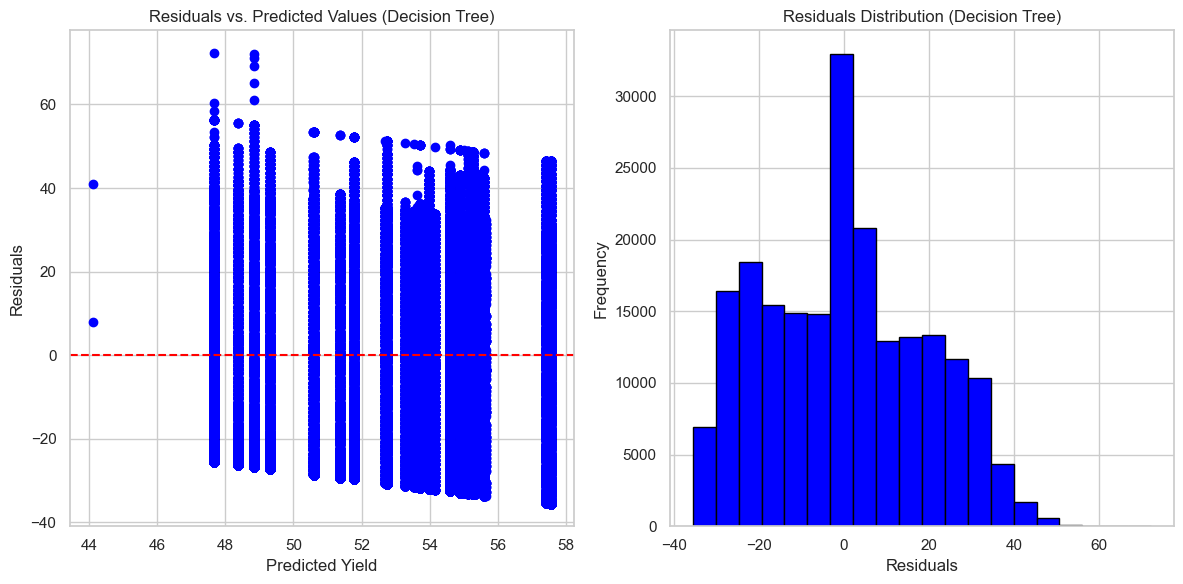

In [50]:
# Calculate residuals (the differences between actual and predicted values)
residuals = y_test_dt - y_pred_dt.flatten()

# Create residual plots
plt.figure(figsize=(12, 6))

# Residuals vs. Predicted Values
plt.subplot(1, 2, 1)
plt.scatter(y_pred_dt, residuals, c='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Yield')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values (Decision Tree)')

# Residuals Distribution
plt.subplot(1, 2, 2)
plt.hist(residuals, bins=20, color='blue', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution (Decision Tree)')

plt.tight_layout()
plt.show()

<H3>Improve the DT Model Performance</H4>

Use the Scaling/Normalization method called Z-Score Normalization to improve the MLR model.

Mean Absolute Error: 15.63564953879636
Mean Squared Error: 371.26531623905356
R-squared (R2): -0.0002239784998112615
Root Mean Squared Error: 19.268246319762824


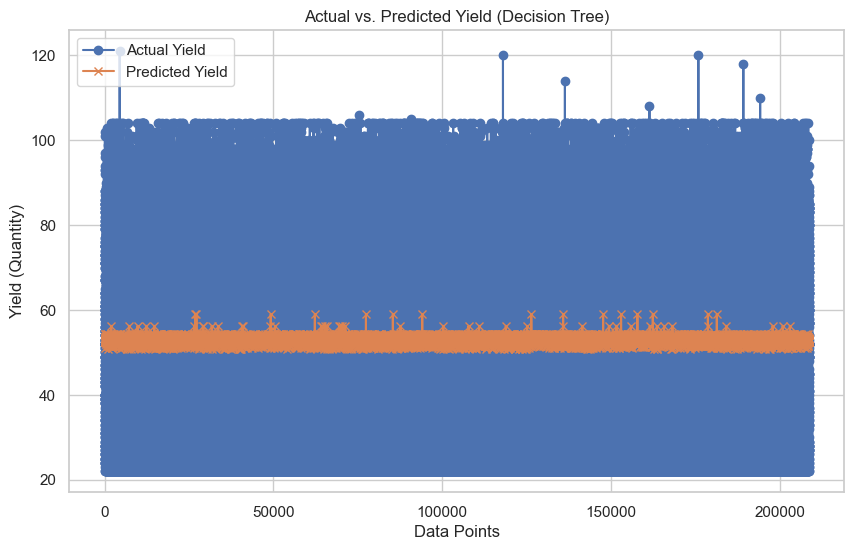

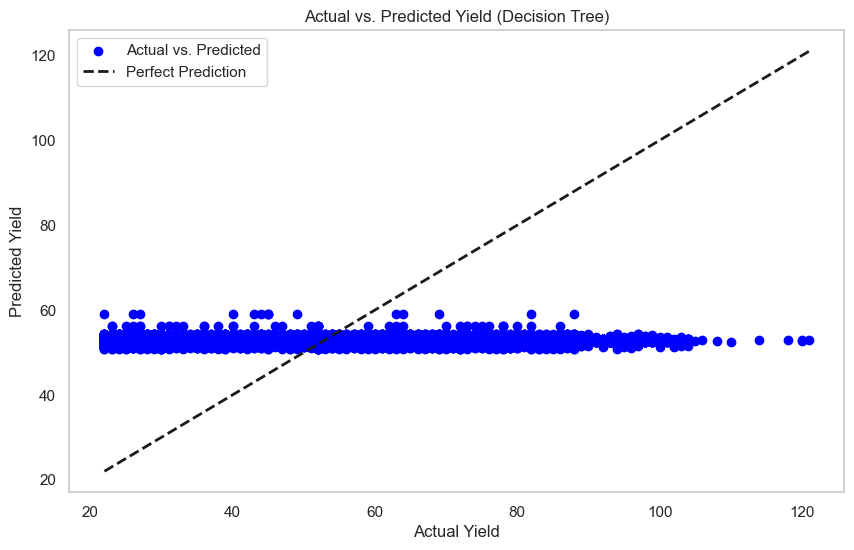

In [51]:
"""
Develop DT ML Model
"""
from sklearn.tree import DecisionTreeRegressor

# Convert the input data to a compatible format
X_train_dt = tf.convert_to_tensor(X_train_dt, dtype=tf.float32)
y_train_dt = tf.convert_to_tensor(y_train_dt, dtype=tf.float32)
X_test_dt = tf.convert_to_tensor(X_test_dt, dtype=tf.float32)
y_test_dt = tf.convert_to_tensor(y_test_dt, dtype=tf.float32)

# Create a MinMaxScaler and fit it to the training data and test data
scaler = MinMaxScaler()
X_train_scaled_dt = scaler.fit_transform(X_train)
X_test_scaled_dt = scaler.transform(X_test)  

# scaler = StandardScaler()
# X_train_scaled_dt = scaler.fit_transform(X_train)
# X_test_scaled_dt = scaler.transform(X_test)  

# Adjust the Hyperparameters of the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(max_depth=5, min_samples_split=2, min_samples_leaf=2, splitter='best')

# Fit the regressor to the training data 
dt_regressor.fit(X_train_scaled_dt, y_train_dt)

# Make predictions on the test data using the trained decision tree
y_pred_dt_new = dt_regressor.predict(X_test_scaled_dt)

# Evaluation metrics for the DT model 
mean_abs_error = mean_absolute_error(y_test_dt, y_pred_dt_new)
mean_sqd_error = mean_squared_error(y_test_dt, y_pred_dt_new)
r_sqd_score = r2_score(y_test_dt, y_pred_dt_new)
root_mean_sqd_error = np.sqrt(mean_sqd_error)

# Print the evaluation metrics for the DT model
print(f"Mean Absolute Error: {mean_abs_error}")
print(f"Mean Squared Error: {mean_sqd_error}")
print(f"R-squared (R2): {r_sqd_score}")
print(f"Root Mean Squared Error: {root_mean_sqd_error}")

#Visualize the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test_dt)), y_test_dt, label='Actual Yield', marker='o')
plt.plot(range(len(y_test_dt)), y_pred_dt_new, label='Predicted Yield', marker='x')
plt.xlabel('Data Points')
plt.ylabel('Yield (Quantity)')
plt.title('Actual vs. Predicted Yield (Decision Tree)')
plt.legend()
plt.show()

# Plot the scatterplot for actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_dt, y_pred_dt_new, c='blue', label='Actual vs. Predicted')
plt.plot([min(y_test_dt), max(y_test_dt)], [min(y_test_dt), max(y_test_dt)], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs. Predicted Yield (Decision Tree)')
plt.legend(loc='best')
plt.grid()
plt.show()


<H4>Residual Plots for DT after Model Improvement<H4/>

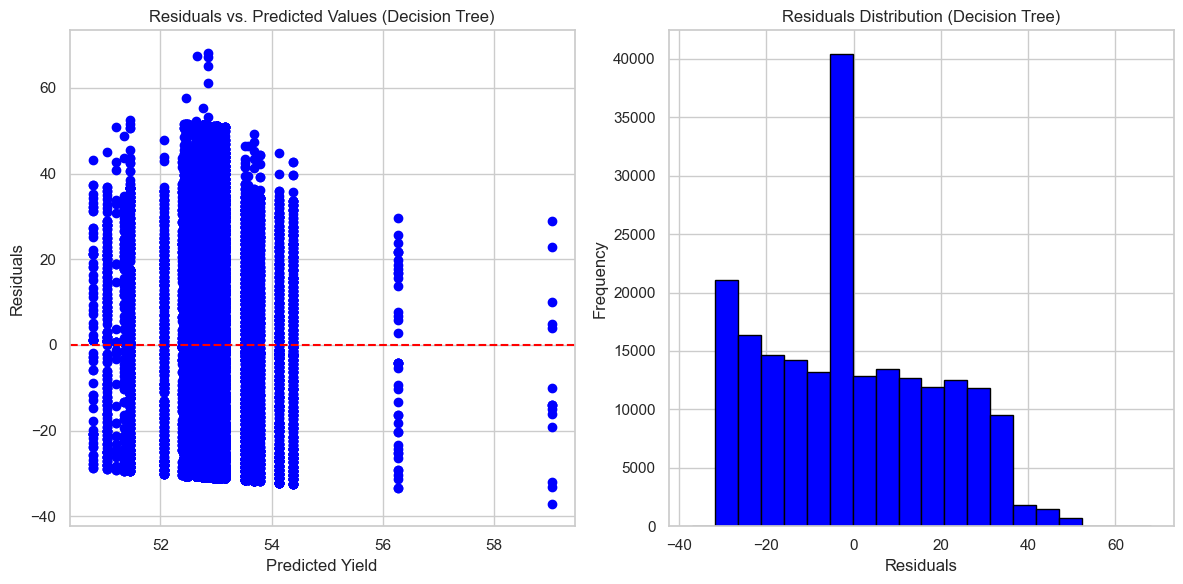

In [52]:
# Calculate residuals (the differences between actual and predicted values)
residuals = y_test_dt - y_pred_dt_new.flatten()

# Create residual plots
plt.figure(figsize=(12, 6))

# Residuals vs. Predicted Values
plt.subplot(1, 2, 1)
plt.scatter(y_pred_dt_new, residuals, c='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Yield')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values (Decision Tree)')

# Residuals Distribution
plt.subplot(1, 2, 2)
plt.hist(residuals, bins=20, color='blue', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution (Decision Tree)')

plt.tight_layout()
plt.show()